In [391]:
#libraries we will use
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [392]:
#reading the file
sales_file = pd.read_csv('.\Downloads\super_market_sales.csv')
sales_file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Explanation of the columns
"""
Invoice id = identification number
bill of sale invoice generated by
computer

Branch = Supercenter Branch
has 3 branches identified by A, B and C).

City = City: Location of supercenters

Customer type = Type of customers,
registered by Socios for customers with a credit card
member and Normal for without membership card.

Gender = Client gender type

Product line = General groups
Item categorization: Electronic accessories
= electronic accessories, Fashion accessories = accessories
fashion, Food and beverages = food and beverages, Health
and beauty = health and beauty, Home and lifestyle = home
and lifestyle, Sports and travel = sports and travel

Unit Price = Price of each product in $

Quantity = Number of products purchased by the
client

Tax = 5% tax rate for purchase of the
client

Total = Total price taxes included

Date = Date of purchase (Record available from
January to March)

Time = Purchase time (10am to 9pm)

Payment = payment used by the client for the
purchase (3 methods are available: cash, credit card)
credit and electronic wallet)

COGS: cost of goods sold

Gross margin percentage = Gross margin percentage

Gross income = Gross income

Rating = stratification rating
of the customer in their overall shopping experience (in
a scale from 1 to 10)

"""

In [393]:
# We are seeing the number of rows and columns
sales_file.shape

(1000, 17)

In [394]:
#checking for duplicate values
sales_file.duplicated().any()

False

In [395]:
#With ".info()" we have a description of each column, the name, the number of rows (not counting null values)
#and the data type of each column
sales_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [402]:
#here we are going to convert the data type of the "Date" and "Time" columns to date and time, we will use "pd.to_datetime" for that
sales_file['Date'] = pd.to_datetime(sales_file['Date'])
sales_file['Time'] = pd.to_datetime(sales_file['Time'])

In [397]:
#we can check here that the data type conversion of "Date" and "Time" was successful
sales_file.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                               object
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [403]:
#we are creating new columns "day", "month", "year" and "hour"
sales_file['day'] = (sales_file['Date']).dt.day_name()
sales_file['month'] = (sales_file['Date']).dt.month
sales_file['year'] = (sales_file['Date']).dt.year
sales_file['hour'] = (sales_file['Time']).dt.hour

In [404]:
sales_file.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-11-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-11-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-11-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-11-06 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-11-06 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,10


In [405]:
#we can see here what values the 'month' column has
sales_file['month'].unique()

array([1, 3, 2], dtype=int64)

In [406]:
#We are changing the values of each month value by its name
sales_file['month'].replace({1:'January', 2:'February', 3:'March'}, inplace=True)
sales_file['month'].unique()

array(['January', 'March', 'February'], dtype=object)

In [407]:
#a quick statistical overview of numeric columns
sales_file.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,year,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,2019.0,20.000000


In [408]:
# we are seeing the number of null values in each column}
sales_file.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
day                        0
month                      0
year                       0
hour                       0
dtype: int64

In [409]:
#checking the number of non-repeating values in each column
sales_file.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
day                           7
month                         3
year                          1
hour                         11
dtype: int64

In [410]:
#number of clients of each gender
sales_file['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Number of clients by gender')

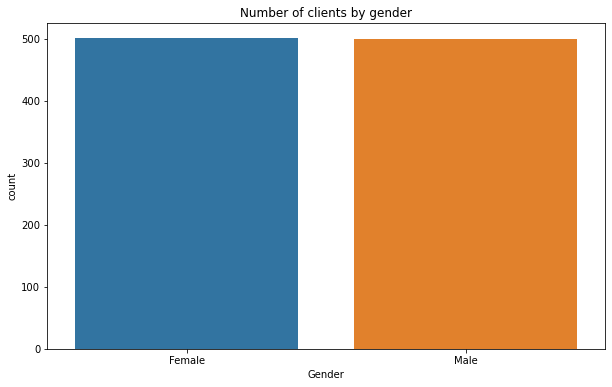

In [411]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=sales_file).set_title("Number of clients by gender")

In [412]:
#checking the number of customers in each branch
sales_file['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Text(0.5, 1.0, 'Number of clients in each Branch')

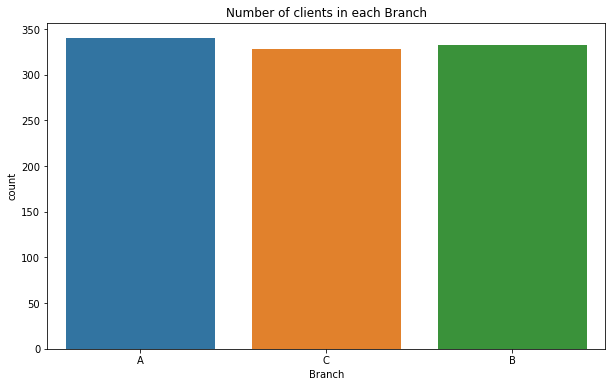

In [413]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data= sales_file).set_title("Number of clients in each Branch")

In [414]:
#checking the number of customers in each City
sales_file['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Text(0.5, 1.0, 'Number of clients in each city')

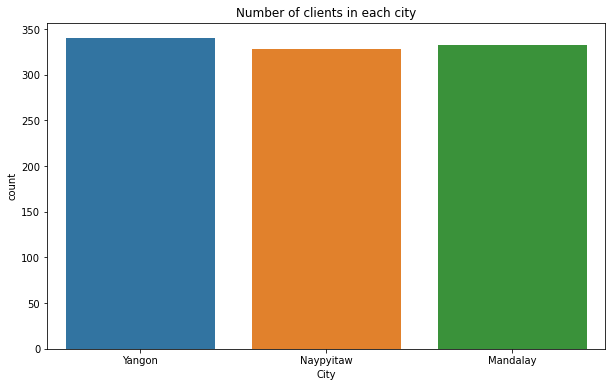

In [415]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=sales_file).set_title('Number of clients in each city')

In [416]:
#Number of clients in each city categorized by branch
sales_file.groupby(['City', 'Branch']).agg(amount=('Invoice ID', 'count'))

,,amount
City,Branch,
Mandalay,B,332
Naypyitaw,C,328
Yangon,A,340


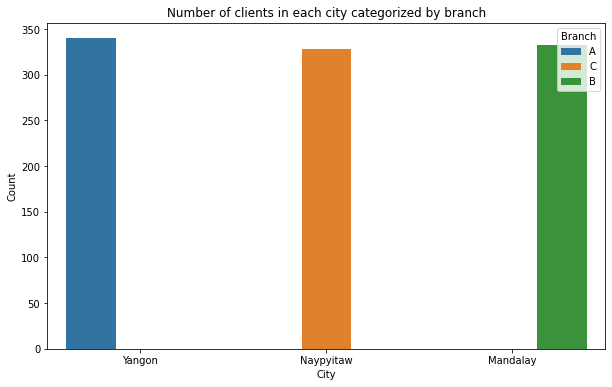

In [417]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Branch', data=sales_file).set_title('Number of clients in each city categorized by branch')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [418]:
#Consultation of the quantity of each type of client
sales_file['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Number of each type of customer')

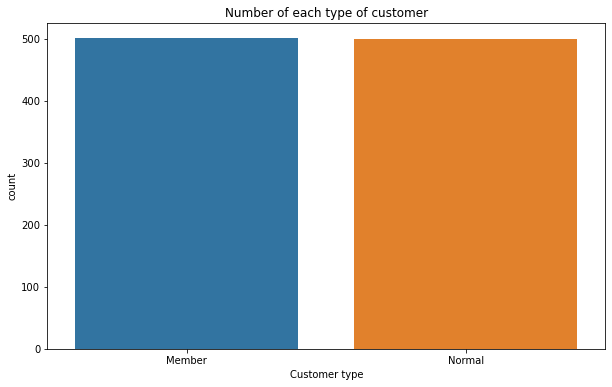

In [419]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer type', data=sales_file).set_title('Number of each type of customer')

In [420]:
#Average rating of each product line
sales_rating_avg = pd.DataFrame(sales_file.groupby('Product line')['Rating'].mean())
sales_rating_avg

,Rating
Product line,
Electronic accessories,6.924706
Fashion accessories,7.029213
Food and beverages,7.113218
Health and beauty,7.003289
Home and lifestyle,6.837500
Sports and travel,6.916265


Text(0.5, 1.0, 'Average rating for each product line')

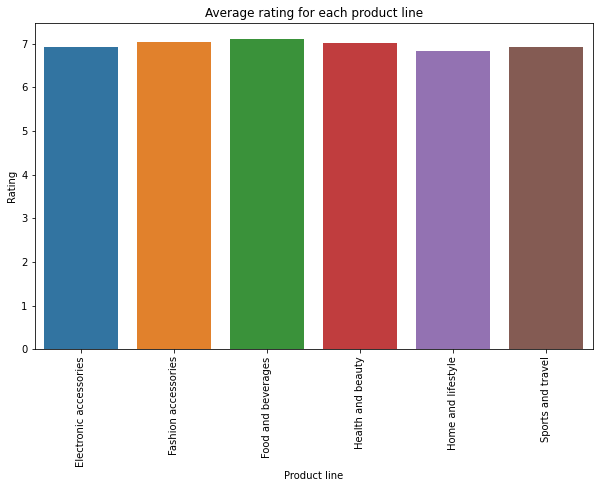

In [421]:
sales_rating_avg = sales_rating_avg.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Rating', data=sales_rating_avg).set_title('Average rating for each product line')

In [422]:
#Number of customers who buy each product line
sales_file['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Text(0.5, 1.0, 'Number of customers who buy each product line')

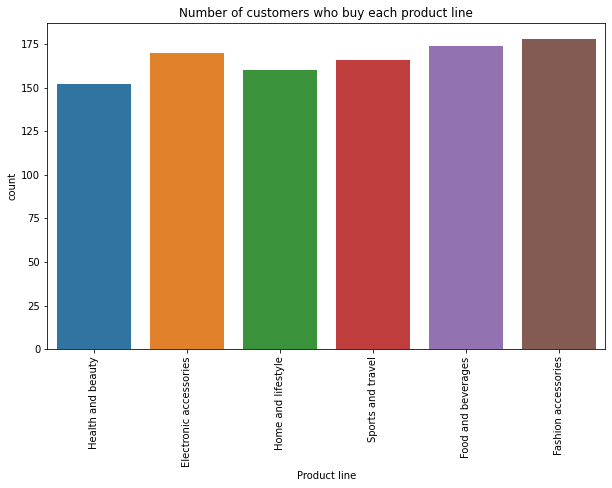

In [423]:
plt.figure(figsize=(10, 6))
#We use xtics(rotation=90) to rotate the name of the categories 90 degrees so they don't get mixed up
plt.xticks(rotation=90)
sns.countplot(x='Product line', data=sales_file).set_title('Number of customers who buy each product line')

In [424]:
#Number of clients per month
sales_file['month'].value_counts()

January     352
March       345
February    303
Name: month, dtype: int64

Text(0.5, 1.0, 'Number of clients per month')

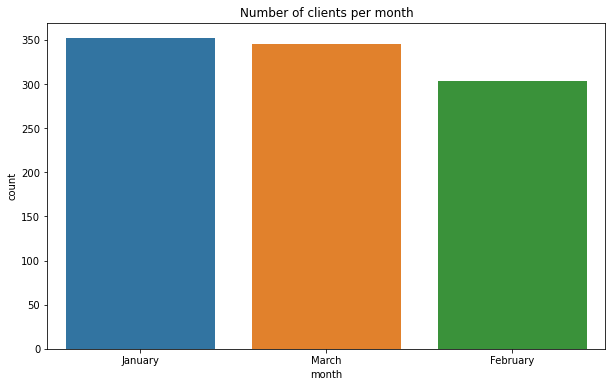

In [425]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=sales_file).set_title('Number of clients per month')

In [426]:
#Number of clients per day
sales_file['day'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: day, dtype: int64

Text(0.5, 1.0, 'Number of clients per day')

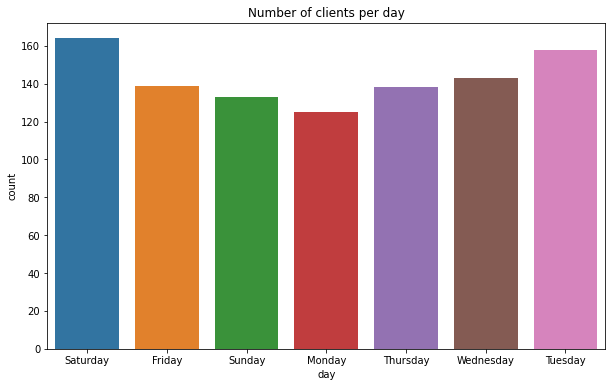

In [427]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=sales_file).set_title('Number of clients per day')

In [428]:
#Number of clients per hour
sales_file['hour'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

Text(0.5, 1.0, 'Number of clients per hour')

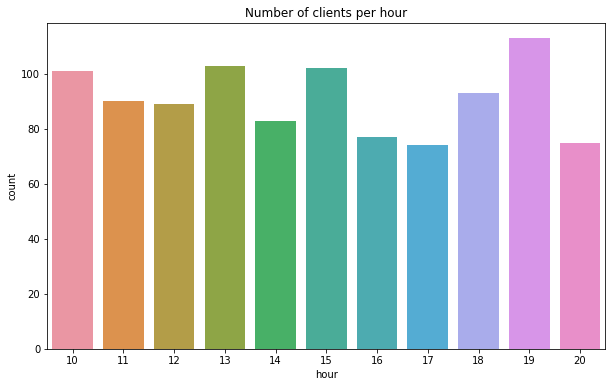

In [429]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=sales_file).set_title('Number of clients per hour')

In [ ]:
#Summary
"""
Times are rounded (10:00 a.m. - 10:59 a.m.) = 10 a.m.,
(11:0 a.m. - 11:59 a.m.) = 11 a.m., ...
1. The number of clients of each gender is very balanced
2. "A" branch is located in "Yangon", "B" is
in "Mandalay" and the "C" is in "Naypyitaw"
3. Of all the branches, the one with the most customers in this
period of 3 months was the "A", but they all have an amount
very similar
4. The number of clients who are members and those who are not
fairly balanced
5. The product line that stood out the most was accessories
fashion, followed by food and drinks, and third the
electronic accessories
6. The product line that stood out the least was health
And beauty
7. On average, the product line that is most accepted
had was the food and drinks, followed by accessories of
fashion, very equal with health and beauty products
8. The least accepted product line in product was
home and lifestyle
9. The month with the most clients was: January
10. The month with the fewest clients was: February
11. The days that most customers went shopping were:
saturday and tuesday
12. The days that fewer customers went shopping were:
monday and sunday
13. The hours that most customers went shopping were
(Top 3): 7:00 p.m., 1:00 p.m., 3:00 p.m.
(very even with 10 o'clock)
14. The hours that most customers went shopping were
(Top 3): 5:00 p.m., 8:00 p.m., 4:00 p.m.
"""

In [430]:
#Consult the amount of each type of customer grouped by gender
sales_file.groupby(['Customer type', 'Gender']).agg(amount=('Invoice ID', 'count'))

amount
Customer type Gender        
Member        Female     261
              Male       240
Normal        Female     240
              Male       259

Text(0.5, 1.0, 'Quantity of each type of customer grouped by gender')

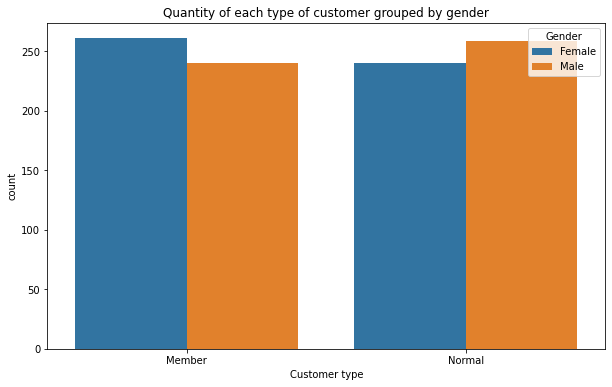

In [431]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer type', hue='Gender', data=sales_file).set_title('Quantity of each type of customer grouped by gender')

In [432]:
#Number of customers who bought each line of products grouped by gender
sales_file.groupby(['Product line', 'Gender']).agg(amount=('Invoice ID', 'count'))

amount
Product line           Gender        
Electronic accessories Female      84
                       Male        86
Fashion accessories    Female      96
                       Male        82
Food and beverages     Female      90
                       Male        84
Health and beauty      Female      64
                       Male        88
Home and lifestyle     Female      79
                       Male        81
Sports and travel      Female      88
                       Male        78

Text(0.5, 1.0, 'Number of customers who bought each product line grouped by gender')

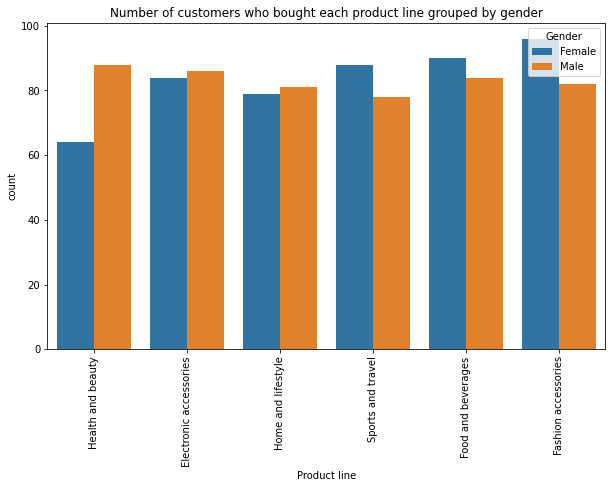

In [433]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(x='Product line', hue='Gender', data=sales_file).set_title('Number of customers who bought each product line grouped by gender')

In [434]:
#Number of customers who buy each line of products grouped by type of Customer
sales_file.groupby(['Product line', 'Customer type']).agg(amount=('Invoice ID', 'count'))

amount
Product line           Customer type        
Electronic accessories Member             78
                       Normal             92
Fashion accessories    Member             86
                       Normal             92
Food and beverages     Member             94
                       Normal             80
Health and beauty      Member             73
                       Normal             79
Home and lifestyle     Member             83
                       Normal             77
Sports and travel      Member             87
                       Normal             79

Text(0.5, 1.0, 'Number of customers who buy each line of products grouped by type of customer')

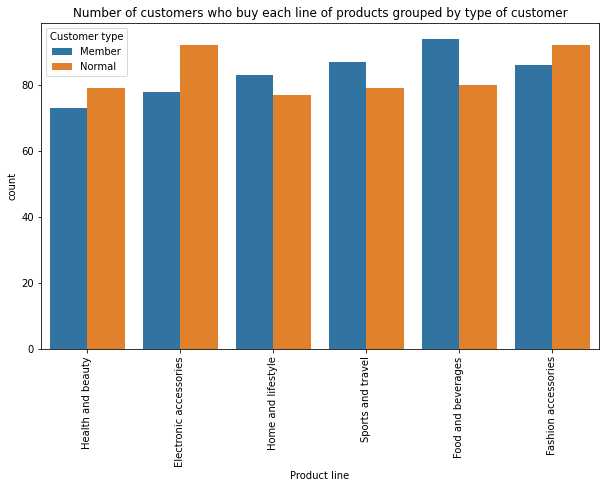

In [435]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.countplot(x='Product line', hue='Customer type', data=sales_file).set_title('Number of customers who buy each line of products grouped by type of customer')

In [436]:
#Number of customers of each gender per month
sales_file.groupby(['month', 'Gender']).agg(amount=('Invoice ID', 'count'))

amount
month    Gender        
February Female     164
         Male       139
January  Female     176
         Male       176
March    Female     161
         Male       184

Text(0.5, 1.0, 'Number of clients of each gender per month')

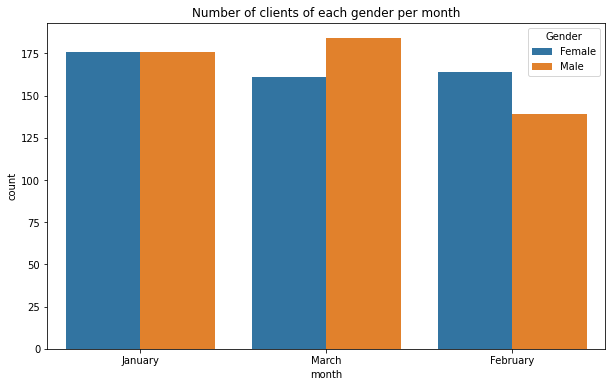

In [437]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month',hue='Gender', data=sales_file).set_title('Number of clients of each gender per month')

In [438]:
#Number of customers of each gender per day
sales_file.groupby(['day', 'Gender']).agg(amount=('Invoice ID', 'count'))

amount
day       Gender        
Friday    Female      65
          Male        74
Monday    Female      68
          Male        57
Saturday  Female      87
          Male        77
Sunday    Female      67
          Male        66
Thursday  Female      63
          Male        75
Tuesday   Female      87
          Male        71
Wednesday Female      64
          Male        79

Text(0.5, 1.0, 'Number of customers of each gender per day')

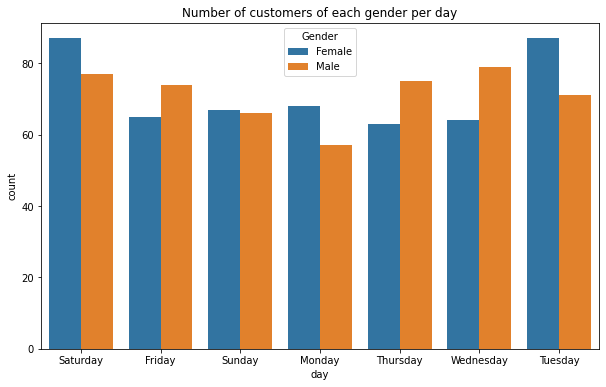

In [439]:
plt.figure(figsize=(10,6))
sns.countplot(x='day',hue='Gender', data=sales_file).set_title('Number of customers of each gender per day')

In [440]:
#Number of customers of each gender per hour
sales_file.groupby(['hour', 'Gender']).agg(amount=('Invoice ID', 'count'))

amount
hour Gender        
10   Female      62
     Male        39
11   Female      47
     Male        43
12   Female      46
     Male        43
13   Female      61
     Male        42
14   Female      39
     Male        44
15   Female      42
     Male        60
16   Female      36
     Male        41
17   Female      38
     Male        36
18   Female      45
     Male        48
19   Female      54
     Male        59
20   Female      31
     Male        44

Text(0.5, 1.0, 'Number of customers of each gender per hour')

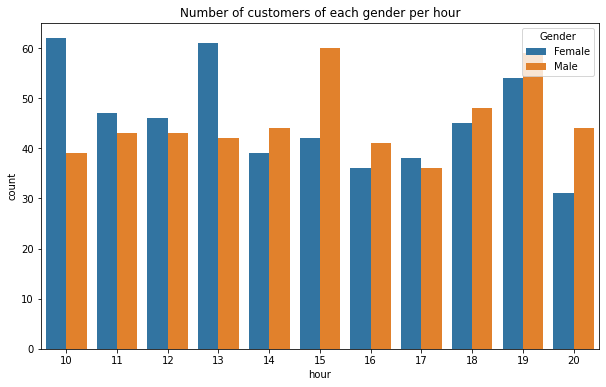

In [441]:
plt.figure(figsize=(10,6))
sns.countplot(x='hour',hue='Gender', data=sales_file).set_title('Number of customers of each gender per hour')

In [37]:
#Summary
"""
1. Women are considerably more likely to choose to be
members than men
2. Women chose significantly more
fashion products, as well as sports and travel
3. Men preferred much more than women for
health and beauty products
4. Customers without membership compared to those with
yes they are, they choose much more (greater than 10 units)
electronic accessories
5. There is a big difference in the food industry and
drinks in the members (being greater than 10 units) in
comparison to those who are not
6. Women shopped more in the month of January,
on the contrary, men did it in March
7. Women shopped less in the month of March
and men in february
8. Women went shopping more on Saturdays
and Tuesday (the same amount) and men on Wednesday
(very even with Saturdays)
9. Women shopped less on Wednesday
(very even with Thursdays) and men on Mondays
10. Women went shopping more at 10 o'clock (very
around 1:00 p.m.) and men at 3:00 p.m. (quite
equal to 7:00 p.m.)
11. Women went shopping less at 8pm and men
men at 5 pm
"""


In [442]:
#Number of sales by product line
sales_file_2= pd.DataFrame(sales_file.groupby('Product line')['Quantity'].sum())
sales_file_2

,Quantity
Product line,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


Text(0.5, 1.0, 'Number of sales by product line')

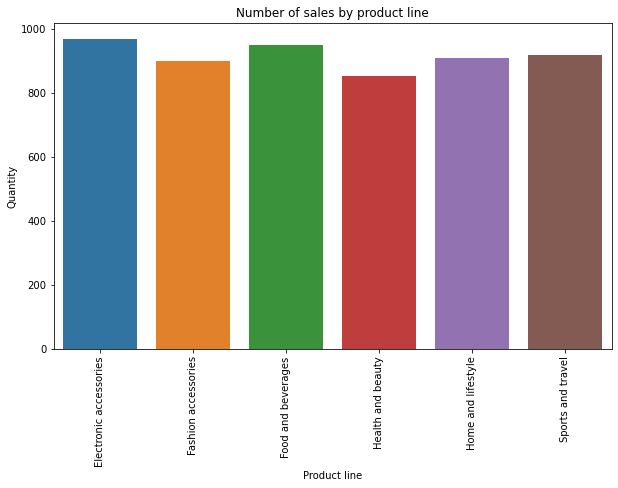

In [443]:
#We need to reset the index of the new dataset to avoid errors when trying to graph
sales_file_2 = sales_file_2.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', data=sales_file_2).set_title('Number of sales by product line')

In [444]:
#Number of customers using each type of payment method
sales_file['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Number of customers using each type of payment method')

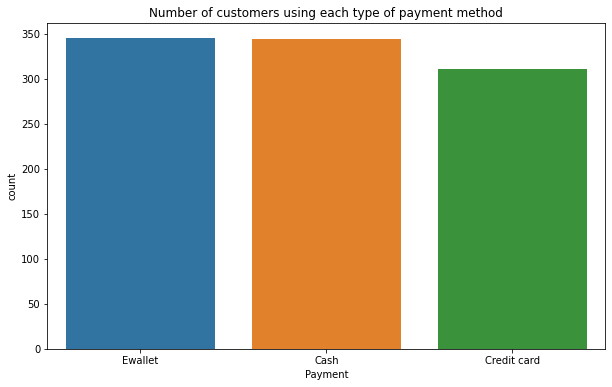

In [445]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=sales_file).set_title('Number of customers using each type of payment method')

In [447]:
#Number of customers who use each type of payment method in the different branches
sales_file.groupby(['Branch', 'Payment']).agg(amount=('Invoice ID', 'count'))

amount
Branch Payment            
A      Cash            110
       Credit card     104
       Ewallet         126
B      Cash            110
       Credit card     109
       Ewallet         113
C      Cash            124
       Credit card      98
       Ewallet         106

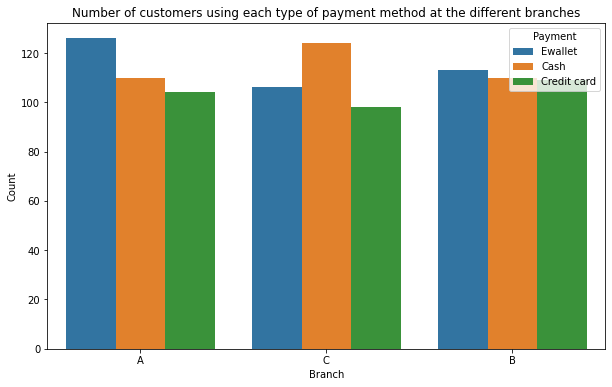

In [448]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', hue='Payment', data=sales_file).set_title('Number of customers using each type of payment method at the different branches')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.show()

In [449]:
#Number of customers using each payment type by gender
sales_file.groupby([ 'Gender', 'Payment']).agg(amount=('Invoice ID', 'count'))

amount
Gender Payment            
Female Cash            178
       Credit card     163
       Ewallet         160
Male   Cash            166
       Credit card     148
       Ewallet         185

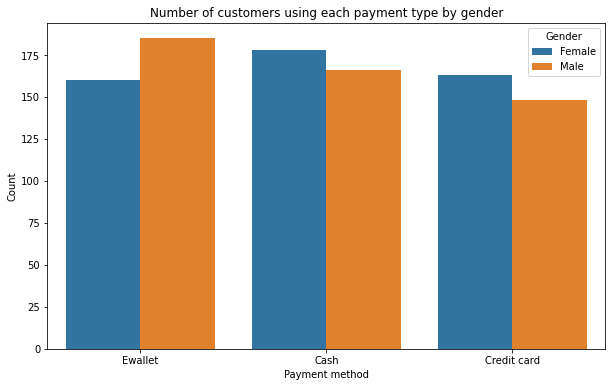

In [450]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', hue='Gender', data=sales_file).set_title('Number of customers using each payment type by gender')
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Valuation percentile of each product line')

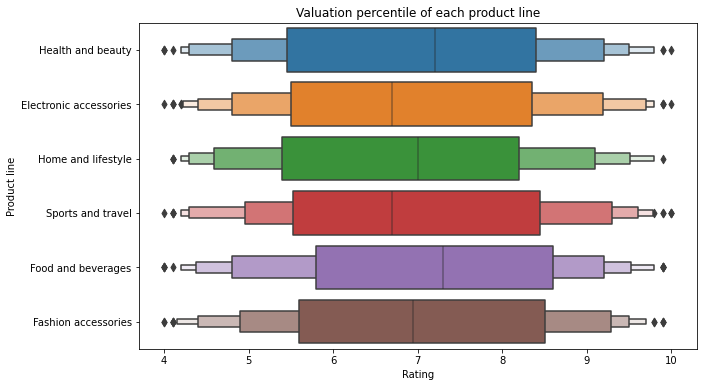

In [451]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Rating', y='Product line', data=sales_file).set_title('Valuation percentile of each product line')

Text(0.5, 1.0, 'Valuation percentile of each branch')

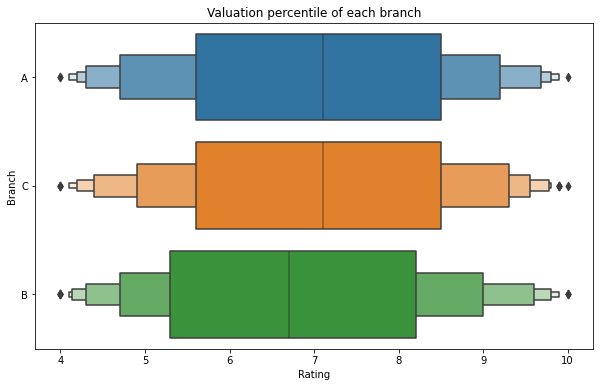

In [452]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Rating', y='Branch', data=sales_file).set_title('Valuation percentile of each branch')

In [69]:
#Summary
"""
1. Even though more customers bought accessories from
beauty, more electronic accessories were sold
and meals
2. Electronic wallets are preferred by the
customers, closely matched with cash, unlike with
the credit cards
3. The electronic wallet is preferred in the branch
"A" and "B", instead cash is preferred in "C"
4. Women prefer to pay more in cash and less with
electronic wallets
5. men prefer to use electronic wallets and less
Credit cards
6. Analyzing the percentiles, the products that have the best
rating are food and drinks, followed by health and beauty
7. The products in branch "C" have better evaluation,
slightly lower is branch "A"
"""


In [453]:
#Amount of sales per month
sales_file_3 = pd.DataFrame(sales_file.groupby('month')['Quantity'].sum())
sales_file_3= sales_file_3.reset_index()
sales_file_3

,month,Quantity
0,February,1654
1,January,1965
2,March,1891


Text(0.5, 1.0, 'Sales amount per month')

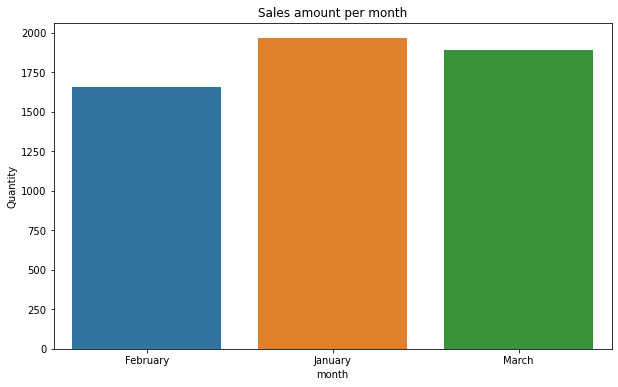

In [454]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='Quantity',data=sales_file_3).set_title('Sales amount per month')

In [455]:
#Amount of sales for each month for each gender
sales_file_4 = pd.DataFrame(sales_file.groupby(['month', 'Gender'])['Quantity'].sum())
sales_file_4 

Quantity
month    Gender          
February Female       951
         Male         703
January  Female      1019
         Male         946
March    Female       899
         Male         992

Text(0.5, 1.0, 'Amount of sales each month for each gender')

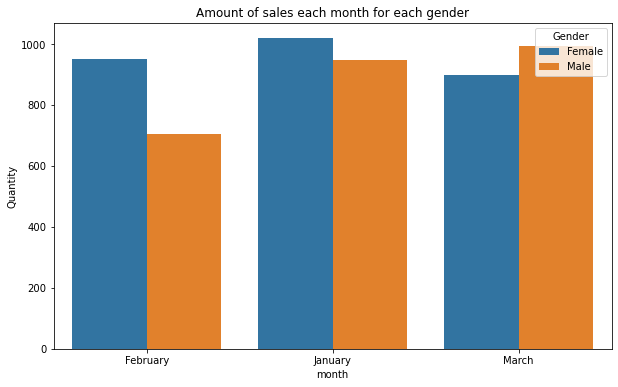

In [456]:
sales_file_4 = sales_file_4.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_file_4['month'], y=sales_file_4['Quantity'], hue=sales_file_4['Gender']).set_title('Amount of sales each month for each gender')

In [457]:
#Quantity sold of each product line by base per month
sales_file_5 = pd.DataFrame(sales_file.groupby(['Product line', 'month'])['Quantity'].sum())
sales_file_5

Quantity
Product line           month             
Electronic accessories February       313
                       January        333
                       March          325
Fashion accessories    February       295
                       January        336
                       March          271
Food and beverages     February       349
                       January        325
                       March          278
Health and beauty      February       266
                       January        254
                       March          334
Home and lifestyle     February       205
                       January        342
                       March          364
Sports and travel      February       226
                       January        375
                       March          319

Text(0.5, 1.0, 'Quantity sold of each product line by base per month')

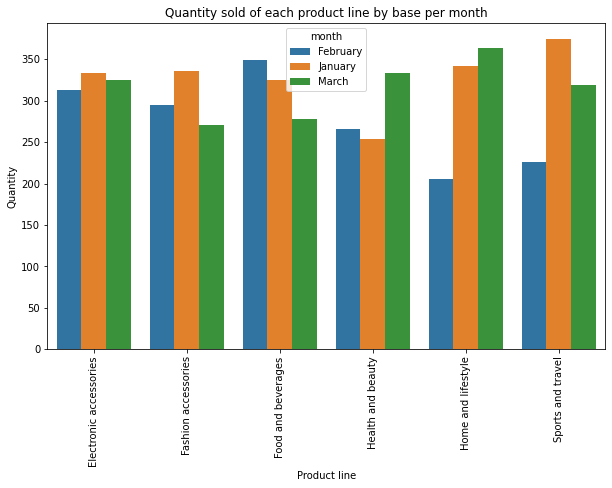

In [458]:
sales_file_5 = sales_file_5.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', hue='month', data=sales_file_5).set_title('Quantity sold of each product line by base per month')

In [459]:
#Number of products sold on a daily basis
sales_file_6 = pd.DataFrame(sales_file.groupby('day')['Quantity'].sum())
sales_file_6

,Quantity
day,
Friday,758
Monday,638
Saturday,919
Sunday,778
Thursday,755
Tuesday,862
Wednesday,800


Text(0.5, 1.0, 'Number of products sold on a daily basis')

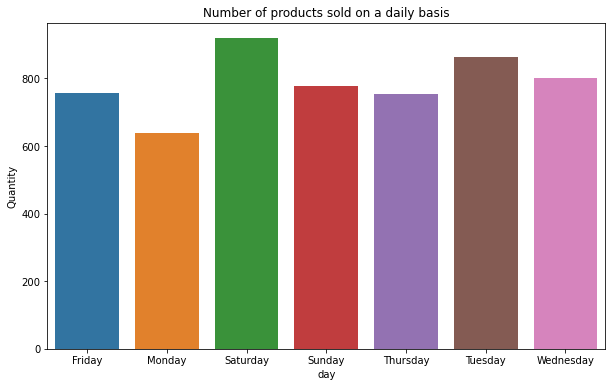

In [460]:
sales_file_6 = sales_file_6.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='Quantity', data=sales_file_6).set_title('Number of products sold on a daily basis')

In [461]:
#Number of products sold each day by gender
sales_file_7 = pd.DataFrame(sales_file.groupby(['day', 'Gender'])['Quantity'].sum())
sales_file_7

Quantity
day       Gender          
Friday    Female       400
          Male         358
Monday    Female       349
          Male         289
Saturday  Female       493
          Male         426
Sunday    Female       417
          Male         361
Thursday  Female       349
          Male         406
Tuesday   Female       499
          Male         363
Wednesday Female       362
          Male         438

Text(0.5, 1.0, 'Number of products sold each day by gender')

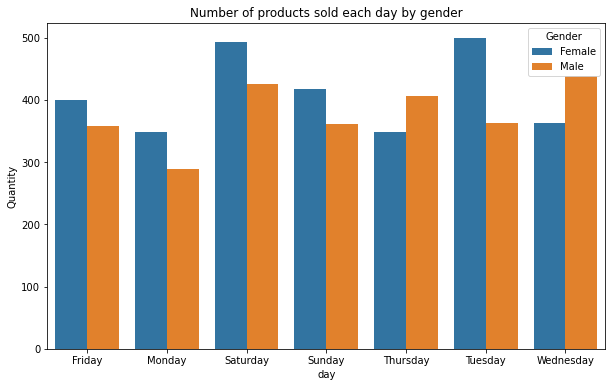

In [462]:
sales_file_7 = sales_file_7.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_file_7['day'], y=sales_file_7['Quantity'], hue=sales_file_7['Gender']).set_title('Number of products sold each day by gender')

In [463]:
#Number of products sold each day by type of customer
sales_file_8 = pd.DataFrame(sales_file.groupby(['day', 'Customer type'])['Quantity'].sum())
sales_file_8

Quantity
day       Customer type          
Friday    Member              352
          Normal              406
Monday    Member              323
          Normal              315
Saturday  Member              464
          Normal              455
Sunday    Member              411
          Normal              367
Thursday  Member              308
          Normal              447
Tuesday   Member              491
          Normal              371
Wednesday Member              436
          Normal              364

Text(0.5, 1.0, 'Number of products sold each day by type of customer')

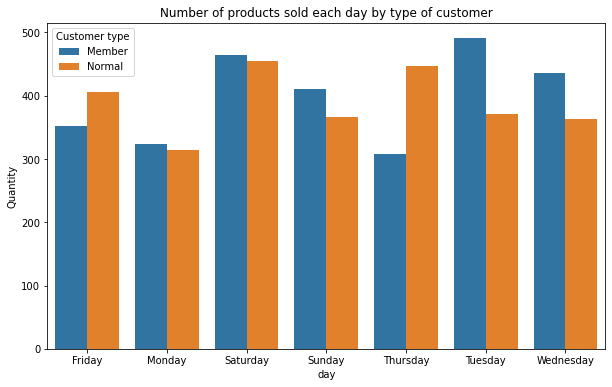

In [464]:
sales_file_8 = sales_file_8.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='Quantity', hue='Customer type', data=sales_file_8).set_title('Number of products sold each day by type of customer')

In [465]:
#Number of products sold each day by type of customer and gender
sales_file_8_1 = pd.DataFrame(sales_file.groupby(['day', 'Customer type','Gender'])['Quantity'].sum())
sales_file_8_1

Quantity
day       Customer type Gender          
Friday    Member        Female       234
                        Male         118
          Normal        Female       166
                        Male         240
Monday    Member        Female       191
                        Male         132
          Normal        Female       158
                        Male         157
Saturday  Member        Female       233
                        Male         231
          Normal        Female       260
                        Male         195
Sunday    Member        Female       212
                        Male         199
          Normal        Female       205
                        Male         162
Thursday  Member        Female       129
                        Male         179
          Normal        Female       220
                        Male         227
Tuesday   Member        Female       317
                        Male         174
          Normal        Female       182
                        Male         189
Wednesday Member        Female       176
                        Male         260
          Normal        Female       186
                        Male         178

In [83]:
#Summary
"""
1. More units were sold in the month of January and fewer
in February.
2. Women bought more units in the months: January
and February
3. Men bought more units in the month of March
4.In January the product lines that sold the most
were (Top 3): Sports and travel, home and lifestyle,
fashion accessories.
5.In February the product lines that sold the most
were (Top 3): Food and drink, electronic accessories,
fashion accessories.
6.In March the product lines that sold the most
were (Top 3): Home and lifestyle, health and beauty,
electronic accessories.
7.The days that sold the most units were
Saturdays, followed by Tuesdays.
8.The days that fewer units were sold were Mondays.
9. Women bought more units than men
days: Sunday, Monday, Tuesday, Friday and Saturday.
10. Men bought more units than women
days: Wednesday and Thursday
11.Membership users bought more units per
on which the days are not: Sunday, Monday, Tuesday,
Wednesday and Saturday
12.Users without membership bought more units per
on which the days are: Thursday and Friday.
13.Las Tuesdays, by women who are members
was the group that bought the most units (classified by
days of the week, membership and gender)
14. On Sundays women who are members buy more,
very similar to what they are.
15. On Mondays women who are members buy more,
the same happens on Tuesdays and with a wide difference.
16. On Wednesdays the men who are members are the
what they buy the most
17.On Thursdays the men who are members are the ones who
more units of products they buy, very even with the
women
18.On Fridays the men who are members are the ones who
more units buy, very even with women who do not
they are.
19.On Saturdays the women who are not members are the
What more units do they buy?
"""

In [466]:
#Number of products sold each day by branch
sales_file_9 = pd.DataFrame(sales_file.groupby('Branch')['Quantity'].sum())
sales_file_9

,Quantity
Branch,
A,1859
B,1820
C,1831


Text(0.5, 1.0, 'Number of products sold each day by branch')

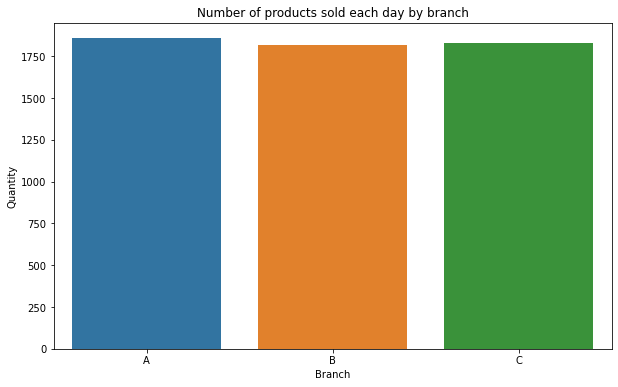

In [467]:
sales_file_9 = sales_file_9.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Quantity', data=sales_file_9).set_title('Number of products sold each day by branch')

In [468]:
#Number of products sold each day by branch categorized by gender
sales_file_10 = pd.DataFrame(sales_file.groupby(['Branch', 'Gender'])['Quantity'].sum())
sales_file_10

Quantity
Branch Gender          
A      Female       909
       Male         950
B      Female       911
       Male         909
C      Female      1049
       Male         782

Text(0.5, 1.0, 'Number of products sold each day by branch categorized by gender')

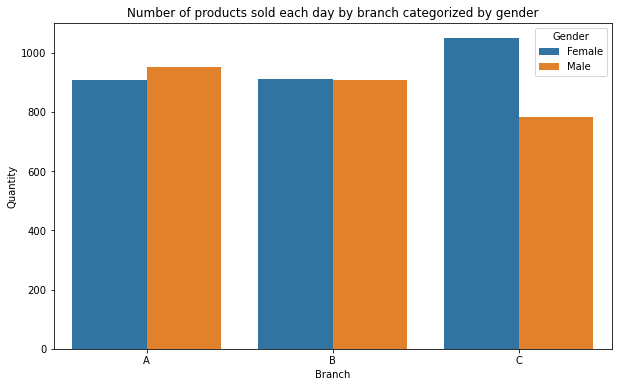

In [469]:
sales_file_10 = sales_file_10.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Quantity', hue='Gender', data=sales_file_10).set_title('Number of products sold each day by branch categorized by gender')

In [470]:
#Number of products sold each day by branch categorized by gender and type of customer
sales_file_10_1 = pd.DataFrame(sales_file.groupby(['Branch', 'Customer type','Gender'])['Quantity'].sum())
sales_file_10_1

Quantity
Branch Customer type Gender          
A      Member        Female       465
                     Male         499
       Normal        Female       444
                     Male         451
B      Member        Female       479
                     Male         445
       Normal        Female       432
                     Male         464
C      Member        Female       548
                     Male         349
       Normal        Female       501
                     Male         433

In [471]:
#Quantities of each product line depending on the day
sales_file_11 = pd.DataFrame(sales_file.groupby(['day', 'Product line'])['Quantity'].sum())
sales_file_11.head()

Quantity
day    Product line                    
Friday Electronic accessories       101
       Fashion accessories          156
       Food and beverages            95
       Health and beauty            145
       Home and lifestyle           131

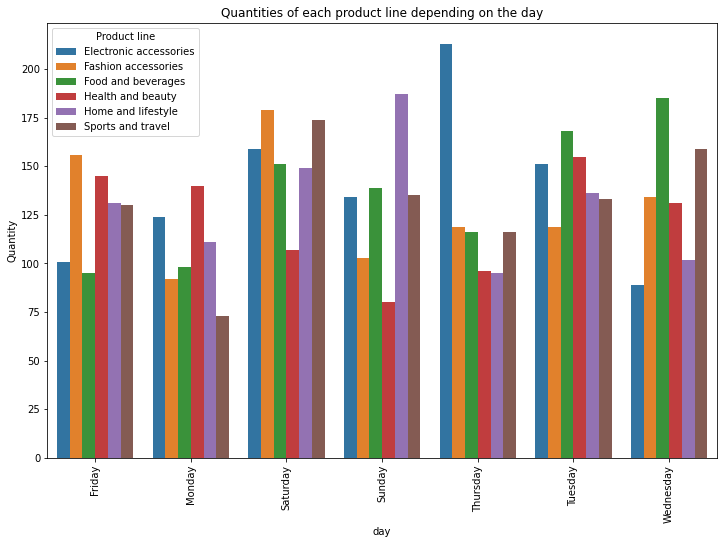

In [472]:
sales_file_11=sales_file_11.reset_index()
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x='day', y='Quantity', hue='Product line', data=sales_file_11).set_title('Quantities of each product line depending on the day')
plt.show()

In [91]:
#Summary
"""
1. The branch that sold the most units was "A"
(all very similar)
2. Men bought more units in the
branch "A"
3. Women bought more units in the
"B" branches (closely matched) and in the
"C" (with wide difference)
4. In branch "A" men who are members were
those who bought the most units.
5. In branches "B" and "C" the women who are
members were the ones who bought the most.
6. On Mondays more units were sold than
product lines (Top 3): Health and beauty, accessories
electronics, home and lifestyle
7. On Tuesdays, more units were sold than
product lines (Top 3): Food and beverage, health
and beauty, electronic accessories
8. On Wednesdays, more units of
product lines (Top 3): Food and beverage,
sport and travel, fashion accessories
9. On Thursdays, more units were sold than
Product Lines (Top 3): Electronic Accessories
(by wide difference), fashion accessories, food
and drink (closely matched with sports and travel)
10. On Fridays, more units of
Product Lines (Top 3): Fashion Accessories,
health and beauty, home and lifestyle (much the same
with with sports and travel)
11. On Saturdays, more units were sold than
product lines (Top 3): Fashion accessories,
sports and travel, electronic accessories
12. On Sundays, more units of
Product lines (Top 3):
Home and lifestyle, food and drink, sports
and travel (closely matched with
electronic accessories)
"""

In [473]:
#Number of products sold every hour
sales_file_12 = pd.DataFrame(sales_file.groupby('hour')['Quantity'].sum())
sales_file_12

,Quantity
hour,
10,525
11,513
12,501
13,585
14,495
15,530
16,420
17,415
18,475


Text(0.5, 1.0, 'Number of products sold every hour')

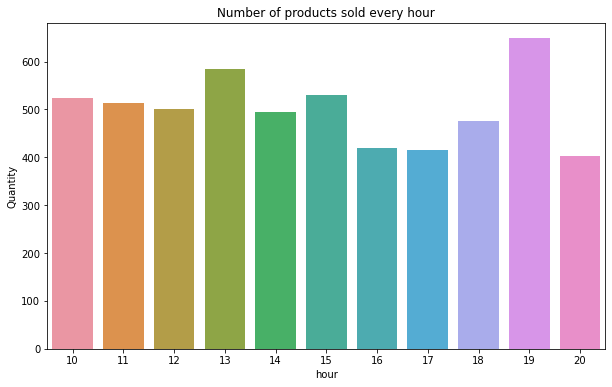

In [474]:
sales_file_12=sales_file_12.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Quantity', data=sales_file_12).set_title('Number of products sold every hour')

In [475]:
#Number of products sold per hour for each gender
sales_file_13 = pd.DataFrame(sales_file.groupby(['hour', 'Gender'])['Quantity'].sum())
sales_file_13

Quantity
hour Gender          
10   Female       309
     Male         216
11   Female       295
     Male         218
12   Female       266
     Male         235
13   Female       382
     Male         203
14   Female       234
     Male         261
15   Female       242
     Male         288
16   Female       209
     Male         211
17   Female       219
     Male         196
18   Female       208
     Male         267
19   Female       322
     Male         327
20   Female       183
     Male         219

Text(0.5, 1.0, 'Number of products sold each hour for each gender')

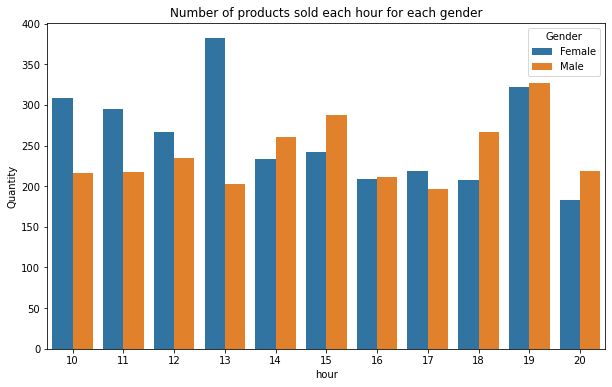

In [476]:
sales_file_13=sales_file_13.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Quantity', hue='Gender',data=sales_file_13).set_title('Number of products sold each hour for each gender')

In [477]:
#Number of products sold per hour to each type of customer'
sales_file_14 = pd.DataFrame(sales_file.groupby(['hour', 'Customer type'])['Quantity'].sum())
sales_file_14

Quantity
hour Customer type          
10   Member              206
     Normal              319
11   Member              260
     Normal              253
12   Member              258
     Normal              243
13   Member              285
     Normal              300
14   Member              284
     Normal              211
15   Member              322
     Normal              208
16   Member              187
     Normal              233
17   Member              213
     Normal              202
18   Member              219
     Normal              256
19   Member              357
     Normal              292
20   Member              194
     Normal              208

Text(0.5, 1.0, 'Number of products sold every hour to each type of customer')

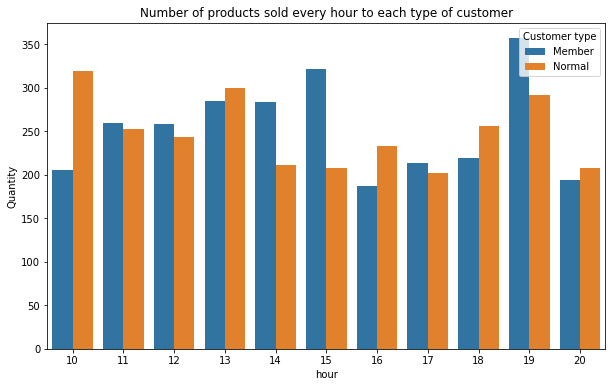

In [478]:
sales_file_14=sales_file_14.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Quantity', hue='Customer type',data=sales_file_14).set_title('Number of products sold every hour to each type of customer')

In [479]:
#Number of products sold per hour per branch
sales_file_15 = pd.DataFrame(sales_file.groupby(['hour', 'Branch'])['Quantity'].sum())
sales_file_15

Quantity
hour Branch          
10   A            192
     B            152
     C            181
11   A            185
     B            192
     C            136
12   A            186
     B            149
     C            166
13   A            183
     B            201
     C            201
14   A            121
     B            201
     C            173
15   A            193
     B            191
     C            146
16   A            182
     B             77
     C            161
17   A            158
     B            106
     C            151
18   A            162
     B            175
     C            138
19   A            172
     B            255
     C            222
20   A            125
     B            121
     C            156

Text(0.5, 1.0, 'Number of products sold every hour per branch')

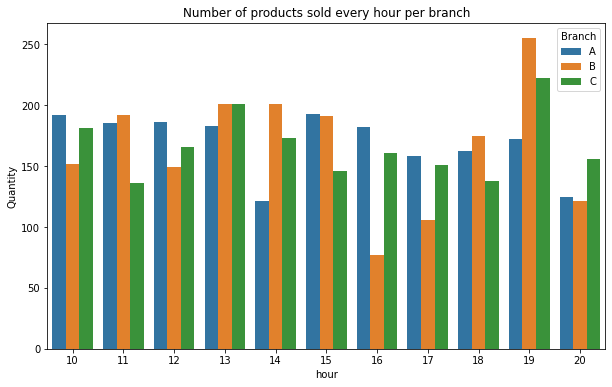

In [480]:
sales_file_15=sales_file_15.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Quantity', hue='Branch',data=sales_file_15).set_title('Number of products sold every hour per branch')

In [481]:
#Number of products sold per hour by product line
sales_file_16 = pd.DataFrame(sales_file.groupby(['Product line', 'hour'])['Quantity'].sum())
sales_file_16.head()

Quantity
Product line           hour          
Electronic accessories 10          89
                       11          98
                       12          89
                       13          76
                       14          84

Text(0.5, 1.0, 'Number of products sold per hour by product line')

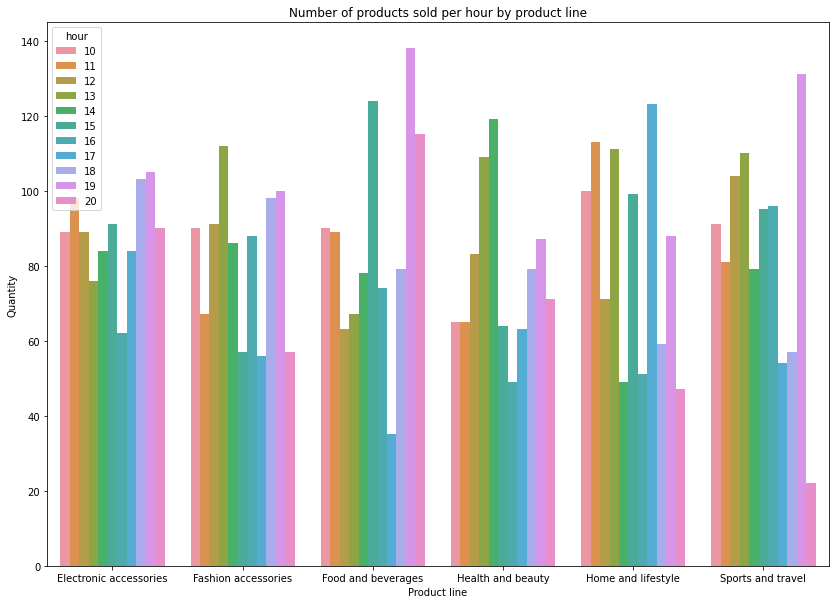

In [482]:
sales_file_16=sales_file_16.reset_index()
plt.figure(figsize=(14, 10))
sns.barplot(x='Product line', y='Quantity', hue='hour',data=sales_file_16).set_title('Number of products sold per hour by product line')

In [ ]:
#Summary
"""
Times are rounded (10am - 10:59am) = 10am,
(11am - 11:59am) = 11am, ...
1. Schedules that more units are sold are (Top 3):
7:00 p.m., 1:00 p.m., 3:00 p.m. (very similar to 10:00 a.m.)
2. Hours when fewer units are sold are (Top 3):
8:00 p.m., 5:00 p.m., 4:00 p.m.
3. Hours in which women buy more units
(Top 3): 1 p.m., 7 p.m., 10 a.m. (same as 11 a.m.)
4. Hours in which women have fewer units
buy (Top 3): 8:00 p.m., 6:00 p.m., 4:00 p.m.
5. Hours in which men drive the most
buy (Top 3:): 7:00 p.m., 3:00 p.m., 6:00 p.m. (very even
with 2:00 p.m.)
6. Hours in which men less units
buy (Top 3:): 5pm, 1pm, 4pm
7. Hours in which the members have the most units
buy (Top 3:): 7:00 p.m., 3:00 p.m., 1:00 p.m.
8. Hours in which the members less units
buy (Top 3:): 4:00 p.m., 8:00 p.m., 10:00 a.m.
9. Hours when normal customers most
units buy (Top 3:): 10am, 1pm, 7pm
10. Hours when normal customers less
units buy (Top 3:): 5:00 p.m., 8:00 p.m., even
with 3 pm
11. Hours when branch customers
"A" more units buy (Top 3:): 3:00 p.m., 10:00 a.m.,
12 noon (very even with 11 o'clock)
12. Hours when branch customers
"A" fewer units buy (Top 3:): 2:00 p.m., 8:00 p.m.,
5:00 p.m.
13. Hours when branch customers
"B" more units buy (Top 3:): 7:00 p.m.,
2:00 p.m., tied with 1:00 p.m.
14. Hours when branch customers
"B" fewer units buy (Top 3:): 4:00 p.m.,
5:00 p.m., 8:00 p.m.
15. Hours when branch customers
"C" more units buy (Top 3:): 7:00 p.m.,
1:00 p.m., 10:00 a.m.
16. Hours when branch customers
"C" fewer units buy (Top 3:): 11am,
6:00 p.m., 3:00 p.m.
17. Hours when more accessories are sold
Electronic (Top 3): 7:00 p.m., 6:00 p.m., 11:00 a.m.
18. Times when fewer accessories are sold
Electronic (Top 3): 4:00 p.m., 1:00 p.m., 5:00 p.m.
(very even with 2:00 p.m.)
19. Hours in which more accessories are sold
Fashion (Top 3): 1:00 p.m., 7:00 p.m., 6:00 p.m.
20. Times when fewer accessories are sold
Fashion (Top 3): 5:00 p.m., 8:00 p.m., 3:00 p.m.
21. Hours in which more food is sold and
drink (Top 3): 7:00 p.m., 3:00 p.m., 8:00 p.m.
22. Times when less food is sold and
Drink (Top 3): 5:00 p.m., 12:00 p.m., 1:00 p.m.
23. Hours in which more products are sold
health and beauty (Top 3): 2:00 p.m., 1:00 p.m., 7:00 p.m.
24. Times when fewer products are sold
health and beauty (Top 3): 4:00 p.m., 5:00 p.m., 3:00 p.m.
25. Hours in which more products are sold
home and lifestyle (Top 3): 5:00 p.m., 11:00 a.m., 1:00 p.m.
26. Hours when fewer products are sold
home and lifestyle (Top 3): 8pm, 2pm, 4pm
27. Hours in which more products are sold
sports and travel (Top 3): 7:00 p.m., 1:00 p.m., 12:00 p.m.
28. Times when fewer products are sold
sports and travel (Top 3): 8:00 p.m., 5:00 p.m., 6:00 p.m.
"""

In [483]:
# Quantities of each product line sold to each type of customer 
sales_file_17 = pd.DataFrame(sales_file.groupby(['Customer type', 'Product line'])['Quantity'].sum())
sales_file_17

Quantity
Customer type Product line                    
Member        Electronic accessories       429
              Fashion accessories          439
              Food and beverages           506
              Health and beauty            428
              Home and lifestyle           490
              Sports and travel            493
Normal        Electronic accessories       542
              Fashion accessories          463
              Food and beverages           446
              Health and beauty            426
              Home and lifestyle           421
              Sports and travel            427

Text(0.5, 1.0, 'Quantities of each product line sold to each type of customer')

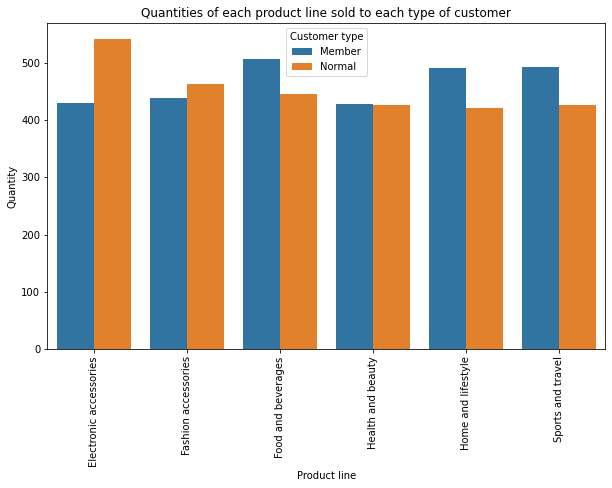

In [484]:
sales_file_17 = sales_file_17.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', hue='Customer type', data=sales_file_17).set_title('Quantities of each product line sold to each type of customer')

In [485]:
# Quantities of each product line sold to each gender
sales_file_18 = pd.DataFrame(sales_file.groupby(['Gender', 'Product line'])['Quantity'].sum())
sales_file_18

Quantity
Gender Product line                    
Female Electronic accessories       488
       Fashion accessories          530
       Food and beverages           514
       Health and beauty            343
       Home and lifestyle           498
       Sports and travel            496
Male   Electronic accessories       483
       Fashion accessories          372
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           413
       Sports and travel            424

Text(0.5, 1.0, 'Quantities of each product line sold to each gender')

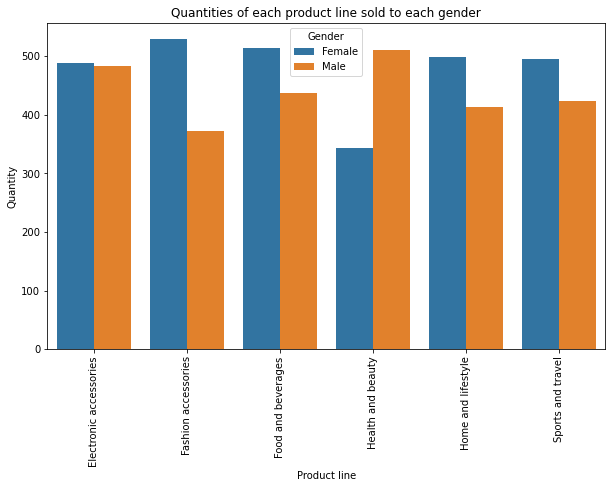

In [486]:
sales_file_18 = sales_file_18.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=sales_file_18).set_title('Quantities of each product line sold to each gender')

In [487]:
#Quantities of each product line sold by payment method
sales_file_19 = pd.DataFrame(sales_file.groupby(['Payment', 'Product line'])['Quantity'].sum())
sales_file_19

Quantity
Payment     Product line                    
Cash        Electronic accessories       398
            Fashion accessories          280
            Food and beverages           295
            Health and beauty            293
            Home and lifestyle           306
            Sports and travel            324
Credit card Electronic accessories       262
            Fashion accessories          293
            Food and beverages           335
            Health and beauty            274
            Home and lifestyle           259
            Sports and travel            299
Ewallet     Electronic accessories       311
            Fashion accessories          329
            Food and beverages           322
            Health and beauty            287
            Home and lifestyle           346
            Sports and travel            297

Text(0.5, 1.0, 'Quantities of each product line sold by payment method')

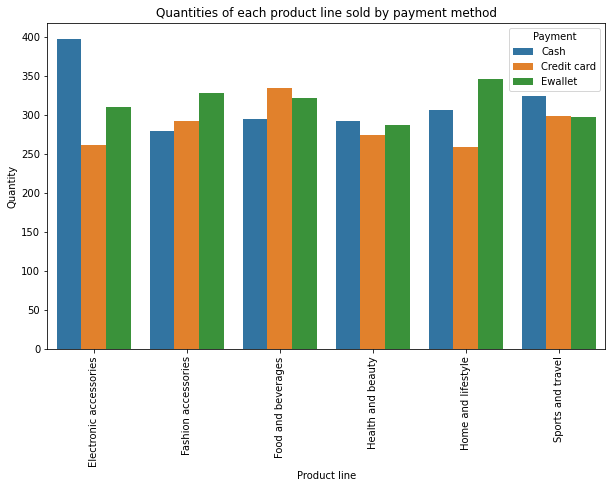

In [488]:
sales_file_19 = sales_file_19.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', hue='Payment', data=sales_file_19).set_title('Quantities of each product line sold by payment method')

In [489]:
#Quantities of each product line sold in each branch
sales_file_20 = pd.DataFrame(sales_file.groupby(['Branch', 'Product line'])['Quantity'].sum())
sales_file_20

Quantity
Branch Product line                    
A      Electronic accessories       322
       Fashion accessories          263
       Food and beverages           313
       Health and beauty            257
       Home and lifestyle           371
       Sports and travel            333
B      Electronic accessories       316
       Fashion accessories          297
       Food and beverages           270
       Health and beauty            320
       Home and lifestyle           295
       Sports and travel            322
C      Electronic accessories       333
       Fashion accessories          342
       Food and beverages           369
       Health and beauty            277
       Home and lifestyle           245
       Sports and travel            265

Text(0.5, 1.0, 'Quantities of each product line sold in each branch')

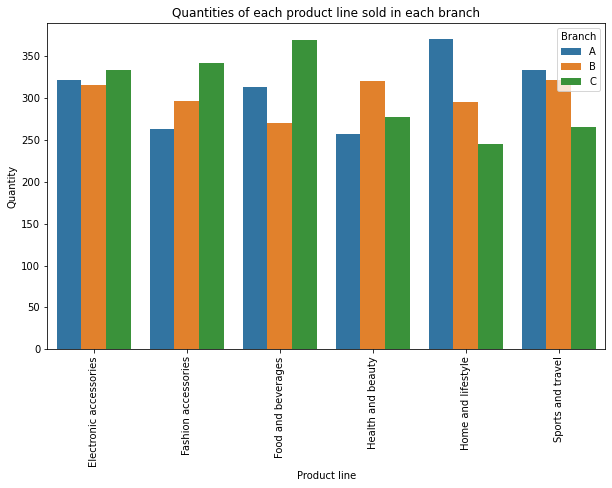

In [490]:
sales_file_20 = sales_file_20.reset_index()
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(x='Product line', y='Quantity', hue='Branch', data=sales_file_20).set_title('Quantities of each product line sold in each branch')

Quantity sold based on the valuation of the product line: Electronic accessories


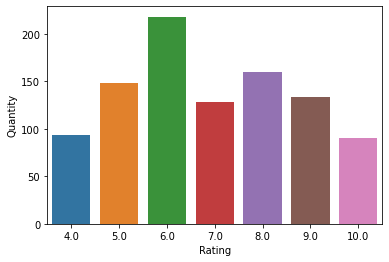

Quantity sold based on the valuation of the product line: Fashion accessories


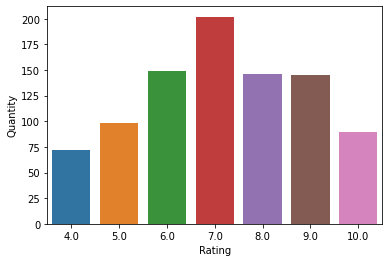

Quantity sold based on the valuation of the product line: Sports and travel


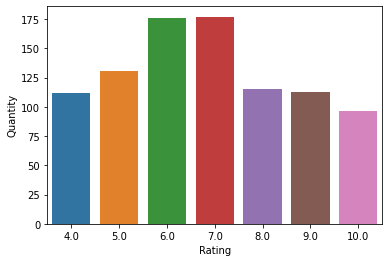

Quantity sold based on the valuation of the product line: Home and lifestyle


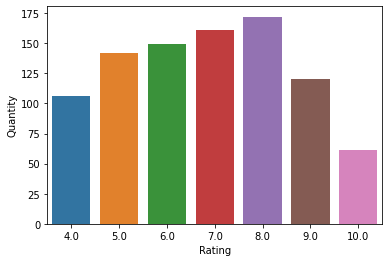

Quantity sold based on the valuation of the product line: Food and beverages


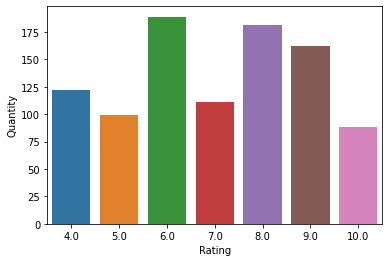

Quantity sold based on the valuation of the product line: Health and beauty


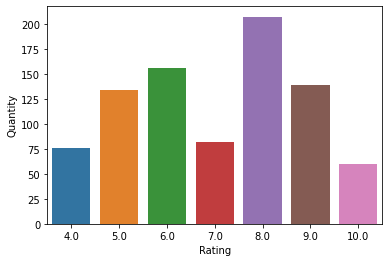

In [491]:
#Quantity sold based on valuation (rounded)
product_lines = ['Electronic accessories', 'Fashion accessories', 'Sports and travel', 'Home and lifestyle', 'Food and beverages', 'Health and beauty']
sales_rating = sales_file.round()
for line in product_lines:
    sales_line_3 = sales_rating[sales_rating['Product line']==line]
    sales_amount_rating_product_line = pd.DataFrame(sales_line_3.groupby('Rating')['Quantity'].sum())
    sales_amount_rating_product_line = sales_amount_rating_product_line.reset_index()
    print(f'Quantity sold based on the valuation of the product line: {line}')
    plt.figure(figsize=(6,4))
    sns.barplot(x = 'Rating', y = 'Quantity',data = sales_amount_rating_product_line)
    plt.show()

In [ ]:
#Summary
"""
1. Product lines that most members
units buy (Top 3): food and beverages,
sports and travel, home and lifestyle
2. Product lines than normal customers
most units buy (Top 3): electronic
accesories (by wide difference), fashion
accessories, food and beverages
3. Product lines that men most
units buy (Top 3): health and beauty,
electronic accessories, food and beverages
4. Product lines that women most
units buy (Top 3): fashion accesories,
food and beverages, home and lifestyle
5. Product lines that are most purchased with
electronic wallet (Top 3): home and
lifestyle, fashion accessories, food and beverages
6. Product lines that are most purchased with
banknotes (Top 3): electronic accesories
(by wide difference), sports and travel,
home and lifestyle
7. Product lines that are most purchased with
credit cards (Top 3): food and
beverages, sports and travel, fashion accessories
8. Product lines that are most purchased in the
branch "A" (Top 3): home and lifestyle,
sports and travel, electronic accessories
9. Product lines that are most purchased in the
branch "B" (Top 3): sports and travel,
health and beauty, electronic accessories
10. Lines of products that are most purchased in the
branch "C" (Top 3): food and beverages,
fashion accessories, electronic accessories
11. Considering the assessment given by the
customers about electronic accessories,
those who reached their highest points of
quantities sold were those with 6 and 8
valuation#Considering the valuation they gave
customers about accessories
electronics, which reached their highest points
low quantities sold were those that
they have 10 and 4 valuation
12. Considering the assessment given by the
customers about fashion accessories,
those who reached their highest points of
quantities sold were those with 7 and
6 valuation
13. Considering the assessment given by the
customers about fashion accessories,
those who reached their lowest points of c
quantities sold were those with 4 and
10 rating
14. Considering the assessment given by the
customers about sport products
and journey, those who reached their highest points
of quantities sold high were the
who have 7 and 6 valuation
15. Considering the assessment given by the
customers about sport products
and journey, those who reached their lowest points
of quantities sold were low
who have 10 and 9 valuation
16. Considering the assessment given by the
customers about household products and
lifestyle, those who reached their points
highest in quantities sold were the
who have 8 and 7 valuation
17. Considering the assessment given by the
customers about household products and
lifestyle, those who reached their points
lowest in quantities sold were the
who have 10 and 4 valuation
18. Considering the assessment given by the
customers about food and drink,
that reached their highest points of amounts
sold were those with 6 and 8 of
assessment
19. Considering the assessment given by the
customers about food and drink,
that reached their lowest points of amounts
sold were those with 10 and 5 of
assessment
20. Considering the assessment given by the
customers about health products and
beauty, those who reached their highest points
of quantities sold were those that
they have 8 and 6 valuation
21. Considering the assessment given by the
customers about health products and
beauty, those who reached their lowest points
of quantities sold were those that
they have 10 and 4 valuation
"""

In [492]:
#Billing based on branch
sales_file_branch = pd.DataFrame(sales_file.groupby('Branch')['Total'].sum())
sales_file_branch = sales_file_branch.reset_index()
sales_file_branch

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


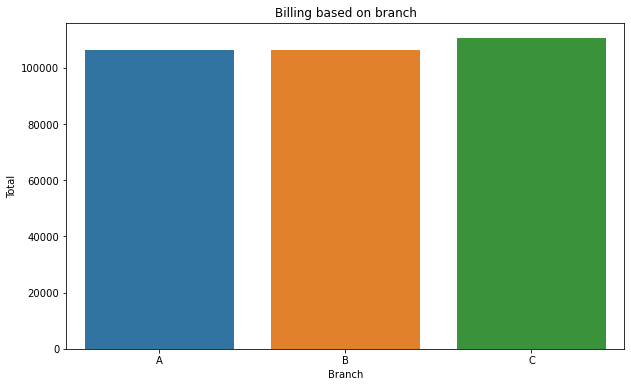

In [493]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=sales_file_branch).set_title('Billing based on branch')
plt.show()

In [494]:
#Billing based on gender 
sales_file_gender = pd.DataFrame(sales_file.groupby('Gender')['Total'].sum())
sales_file_gender = sales_file_gender.reset_index()
sales_file_gender

,Gender,Total
0,Female,167882.925
1,Male,155083.824


Text(0.5, 1.0, 'Billing based on gender')

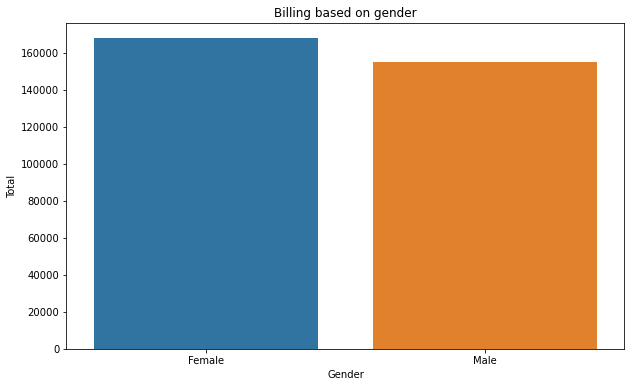

In [496]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total', data=sales_file_gender).set_title('Billing based on gender')

In [497]:
#Billing based on the type of client
sales_file_customer_type = pd.DataFrame(sales_file.groupby('Customer type')['Total'].sum())
sales_file_customer_type = sales_file_customer_type.reset_index()
sales_file_customer_type 

,Customer type,Total
0,Member,164223.444
1,Normal,158743.305


Text(0.5, 1.0, '#Billing based on the type of client')

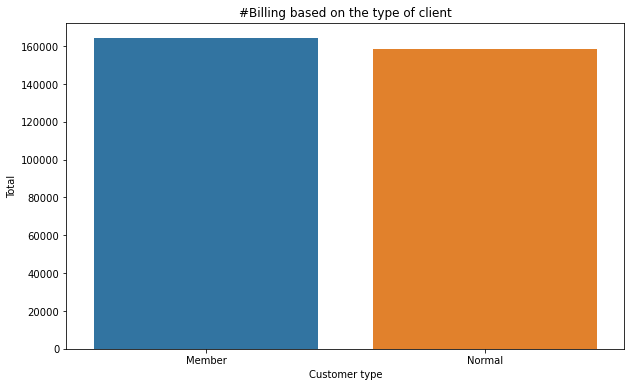

In [498]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total', data=sales_file_customer_type).set_title('#Billing based on the type of client')

In [499]:
#To determine on which dates each day of the week
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for day in days:
    if day == 'Sunday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        sunday_dates = sales_d
    elif day == 'Monday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        monday_dates = sales_d
    elif day == 'Tuesday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        tuesday_dates = sales_d  
    elif day == 'Wednesday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        wednesday_dates = sales_d 
    elif day == 'Thursday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        thursday_dates = sales_d
    elif day == 'Friday':
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        friday_dates = sales_d 
    else:
        sales_d = sales_file[sales_file['day']==day] 
        sales_d = pd.DataFrame(sales_d.groupby('Date')['Total'].sum())
        sales_d = sales_d.reset_index()
        saturday_dates = sales_d

In [500]:
print('Dates that were Sunday and billing for those dates:')
sunday_dates

Dates that were Sunday and billing for those dates:


,Date,Total
0,2019-01-06,3614.2050
1,2019-01-13,2451.2040
2,2019-01-20,3655.4490
3,2019-01-27,4635.8970
4,2019-02-03,5467.9275
5,2019-02-10,3141.0225
6,2019-02-17,5299.5705
7,2019-02-24,2722.4610
8,2019-03-03,4853.1735
9,2019-03-10,3163.2300


Text(0.5, 1.0, 'Dates that were Sunday and billing for those dates:')

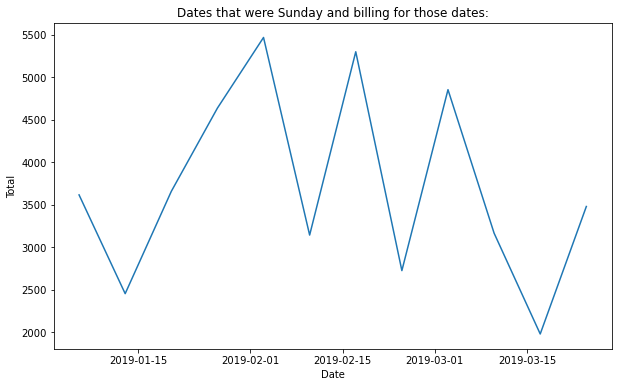

In [501]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = sunday_dates).set_title('Dates that were Sunday and billing for those dates:')

In [502]:
print('Dates that were Monday and billing for those dates:')
monday_dates 

Dates that were Monday and billing for those dates:


,Date,Total
0,2019-01-07,2834.2440
1,2019-01-14,3966.6165
2,2019-01-21,2392.0995
3,2019-01-28,4999.7115
4,2019-02-04,2439.4965
5,2019-02-11,4542.1530
6,2019-02-18,1496.0295
7,2019-02-25,4807.2360
8,2019-03-04,3894.4395
9,2019-03-11,2961.2520


Text(0.5, 1.0, 'Dates that were Monday and billing for those dates:')

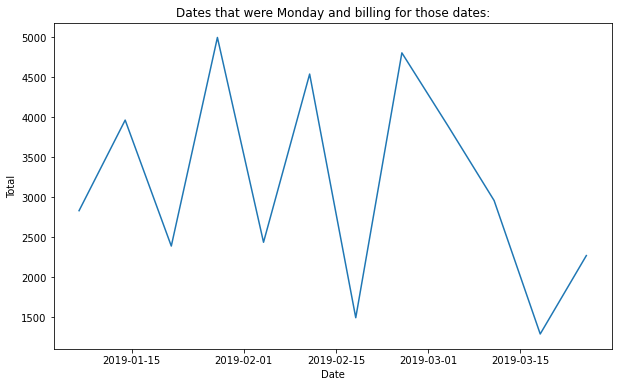

In [503]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = monday_dates).set_title('Dates that were Monday and billing for those dates:')

In [504]:
print('Dates that were Tuesday and billing for those dates:')
tuesday_dates 

Dates that were Tuesday and billing for those dates:


,Date,Total
0,2019-01-01,4745.1810
1,2019-01-08,5293.7325
2,2019-01-15,5944.2600
3,2019-01-22,1704.7695
4,2019-01-29,3516.5655
5,2019-02-05,3031.1295
6,2019-02-12,2998.9890
7,2019-02-19,4228.1190
8,2019-02-26,2408.1645
9,2019-03-05,6230.8785


Text(0.5, 1.0, 'Dates that were Tuesday and billing for those dates:')

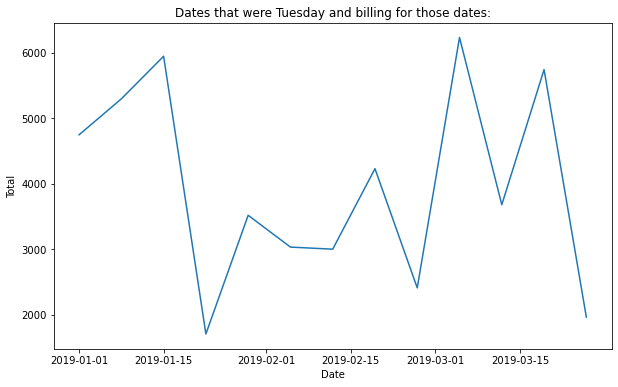

In [505]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = tuesday_dates).set_title('Dates that were Tuesday and billing for those dates:')

In [506]:
print('Dates that were Wednesdays and billing for those dates:')
wednesday_dates

Dates that were Wednesdays and billing for those dates:


,Date,Total
0,2019-01-02,1945.5030
1,2019-01-09,3021.3435
2,2019-01-16,4289.0820
3,2019-01-23,5994.1875
4,2019-01-30,2558.2620
5,2019-02-06,2905.4235
6,2019-02-13,934.2375
7,2019-02-20,2706.4170
8,2019-02-27,5859.4515
9,2019-03-06,3092.5965


In [507]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = wednesday_dates).set_title('Dates that were Wednesdays and billing for those dates:

SyntaxError: EOL while scanning string literal (3988079320.py, line 2)

In [508]:
print('Dates that were Thursday and billing for those dates:')
thursday_dates

Dates that were Thursday and billing for those dates:


,Date,Total
0,2019-01-03,2078.1285
1,2019-01-10,3560.9490
2,2019-01-17,3142.7550
3,2019-01-24,5402.0505
4,2019-01-31,5232.4965
5,2019-02-07,7228.2105
6,2019-02-14,2454.0915
7,2019-02-21,1393.7385
8,2019-02-28,2097.0180
9,2019-03-07,1438.2585


Text(0.5, 1.0, 'Dates that were Thursday and billing for those dates:')

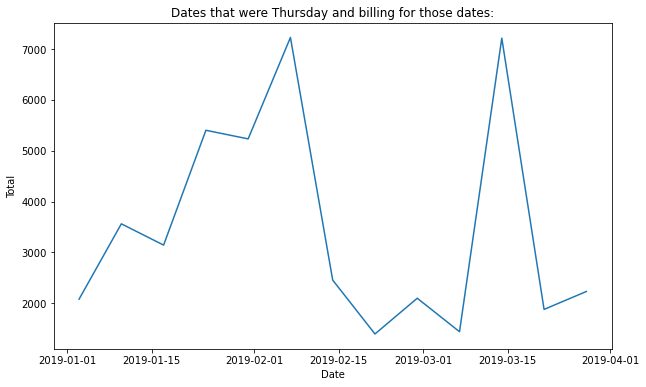

In [509]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = thursday_dates).set_title('Dates that were Thursday and billing for those dates:')

In [510]:
print('Dates that were Friday and billing for those dates:')
friday_dates

Dates that were Friday and billing for those dates:


,Date,Total
0,2019-01-04,1623.6885
1,2019-01-11,2114.9625
2,2019-01-18,2780.4735
3,2019-01-25,4700.3670
4,2019-02-01,2444.5365
5,2019-02-08,5084.6565
6,2019-02-15,6830.7855
7,2019-02-22,2442.3105
8,2019-03-01,2634.3660
9,2019-03-08,3125.3880


Text(0.5, 1.0, 'Dates that were Friday and billing for those dates:')

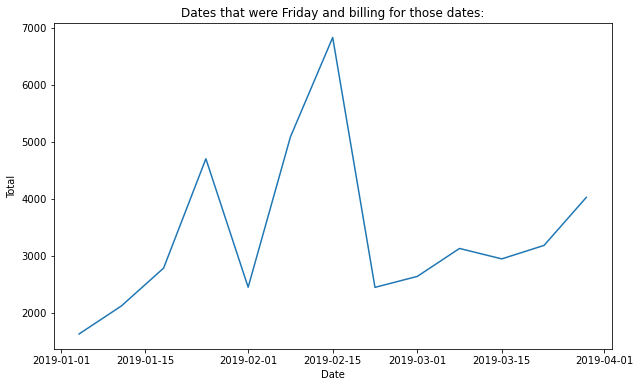

In [511]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = friday_dates).set_title('Dates that were Friday and billing for those dates:')

In [512]:
print('Dates that were Saturday and billing for those dates:')
saturday_dates

Dates that were Saturday and billing for those dates:


,Date,Total
0,2019-01-05,3536.6835
1,2019-01-12,5184.7635
2,2019-01-19,4914.7245
3,2019-01-26,4457.5125
4,2019-02-02,4140.9480
5,2019-02-09,3271.8945
6,2019-02-16,2503.7670
7,2019-02-23,2339.5890
8,2019-03-02,6560.3055
9,2019-03-09,7474.0470


Text(0.5, 1.0, 'Dates that were Saturday and billing for those dates:')

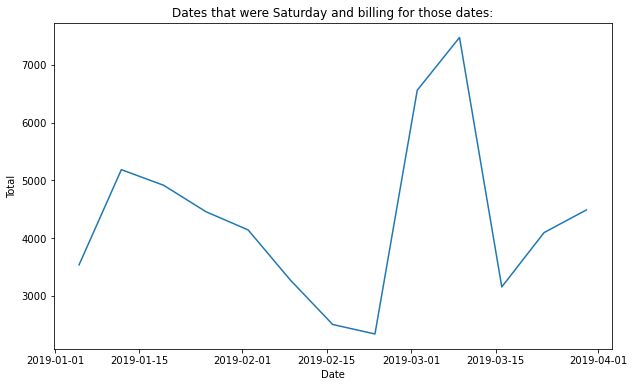

In [513]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Date', y = 'Total', data = saturday_dates).set_title('Dates that were Saturday and billing for those dates:')

In [514]:
#Billing based on date 
sales_file_date = pd.DataFrame(sales_file.groupby('Date')['Total'].sum())
sales_file_date = sales_file_date.reset_index()
sales_file_date.head()

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835


Text(0.5, 1.0, '#Billing based on date')

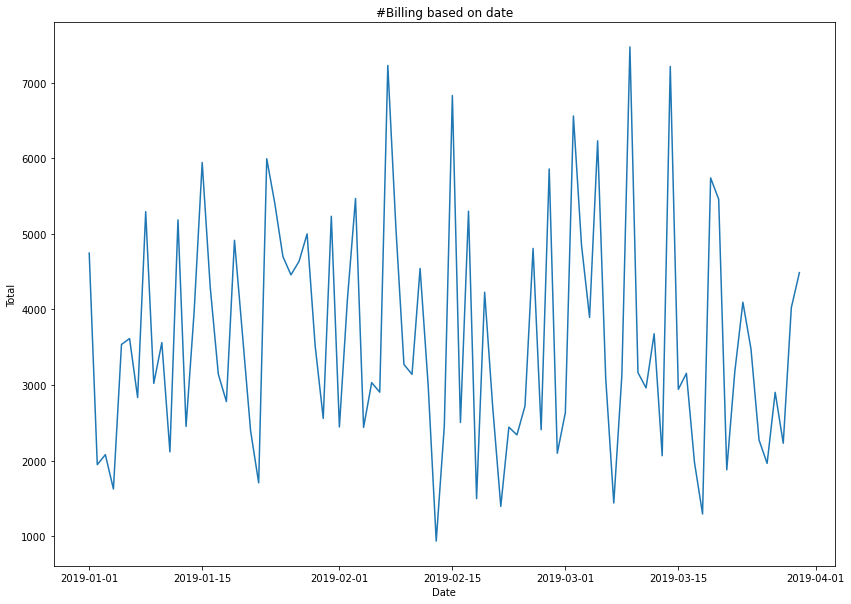

In [515]:
plt.figure(figsize=(14,10))
sns.lineplot(x = 'Date', y = 'Total', data = sales_file_date).set_title('#Billing based on date')

Billing of A based on the date 


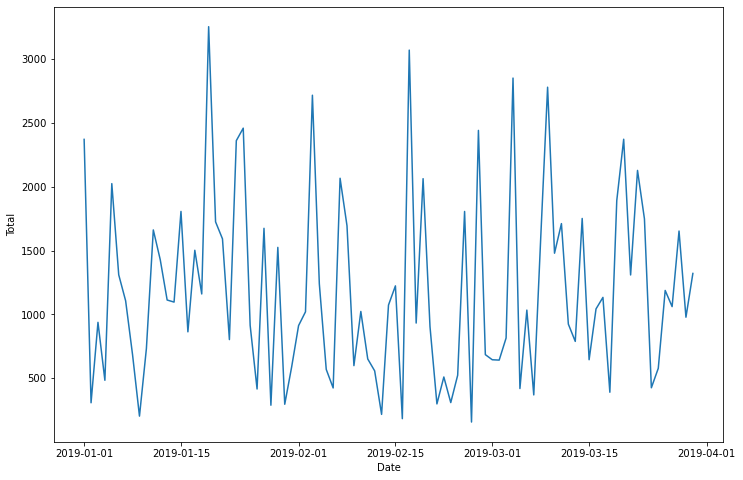

Billing of B based on the date 


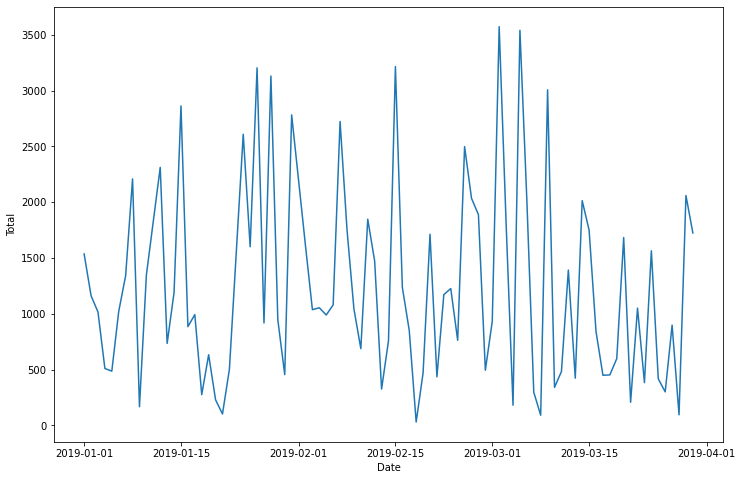

Billing of C based on the date 


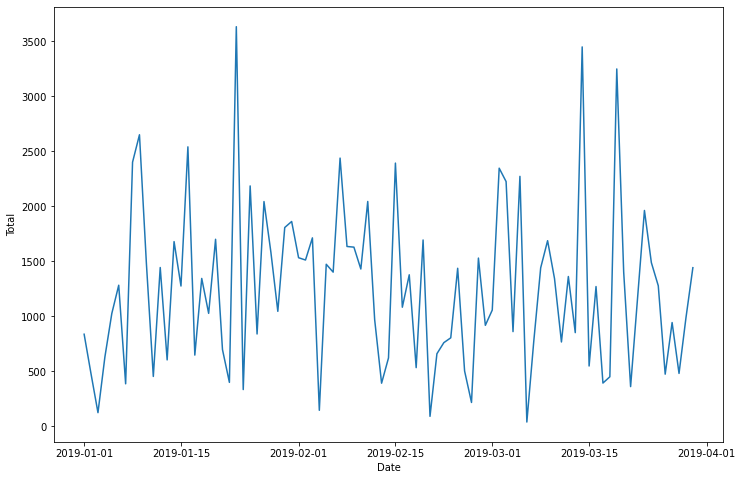

In [516]:
#Billing based on the date (of each branch)
Branch = ['A', 'B', 'C']
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_file_date_branch = pd.DataFrame(sales_branch.groupby(['Branch', 'Date'])['Total'].sum())
    sales_file_date_branch = sales_file_date_branch.reset_index()
    print(f'Billing of {branch} based on the date ')
    plt.figure(figsize=(12,8))
    sns.lineplot(x = 'Date', y = 'Total',data = sales_file_date_branch)
    plt.show()

In [517]:
#Billing based on the hour
sales_file_hour = pd.DataFrame(sales_file.groupby('hour')['Total'].sum())
sales_file_hour = sales_file_hour.reset_index()
sales_file_hour

,hour,Total
0,10,31421.4810
1,11,30377.3295
2,12,26065.8825
3,13,34723.2270
4,14,30828.3990
5,15,31179.5085
6,16,25226.3235
7,17,24445.2180
8,18,26030.3400
9,19,39699.5130


Text(0.5, 1.0, 'Billing based on the hour')

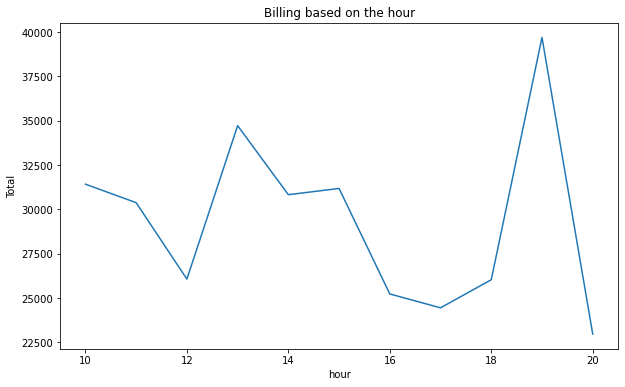

In [518]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'hour', y = 'Total', data = sales_file_hour).set_title('Billing based on the hour')

In [519]:
#Billing based on the day
sales_file_day = pd.DataFrame(sales_file.groupby('day')['Total'].sum())
sales_file_day

,Total
day,
Friday,43926.3405
Monday,37899.0780
Saturday,56120.8095
Sunday,44457.8925
Thursday,45349.2480
Tuesday,51482.2455
Wednesday,43731.1350


Text(0.5, 1.0, 'Billing based on the day')

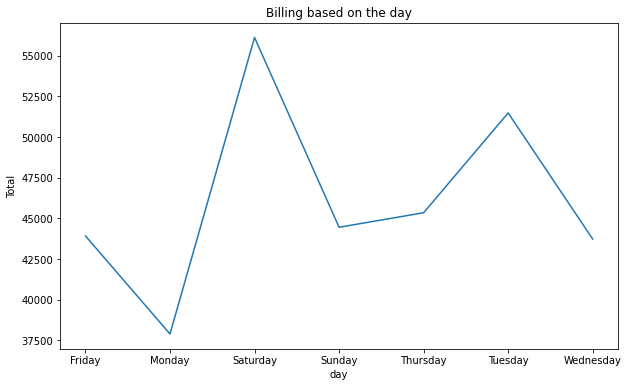

In [520]:
sales_file_day = sales_file_day.reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x = 'day', y = 'Total', data = sales_file_day).set_title('Billing based on the day')

Billing of branch A per hour


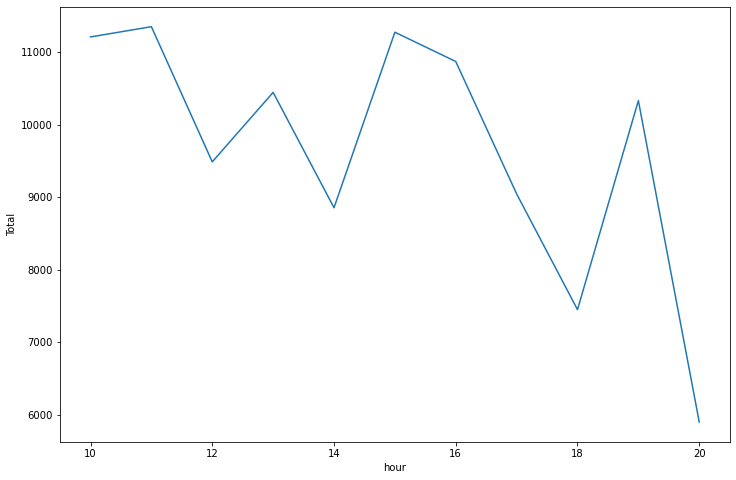

Billing of branch B per hour


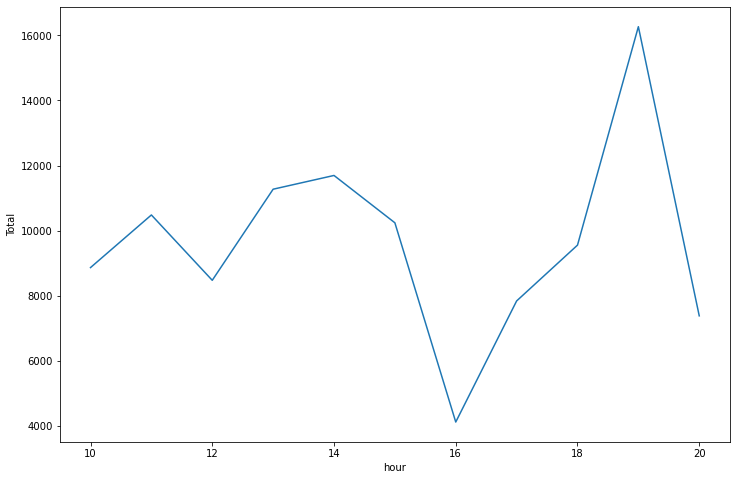

Billing of branch C per hour


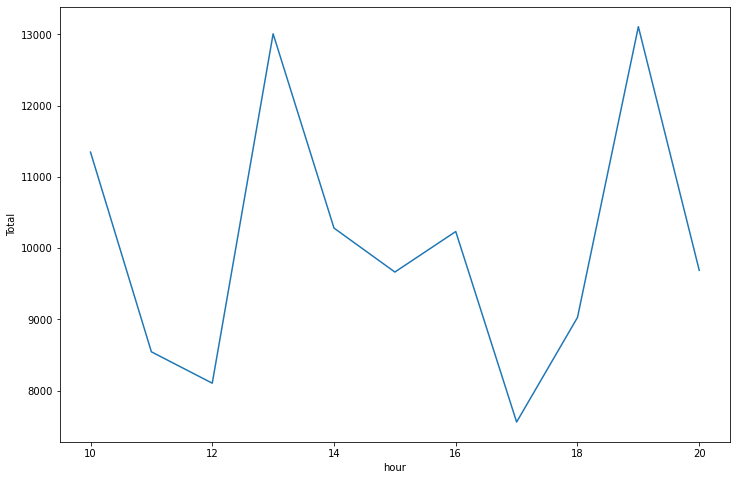

In [521]:
#Billing based on the hour (for each branch)
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_billing_hour_branch = pd.DataFrame(sales_branch.groupby(['Branch', 'hour'])['Total'].sum())
    sales_billing_hour_branch = sales_billing_hour_branch.reset_index()
    print(f'Billing of branch {branch} per hour')
    plt.figure(figsize=(12,8))
    sns.lineplot(x = 'hour', y = 'Total',data = sales_billing_hour_branch)
    plt.show()

Billing of branch A per branch


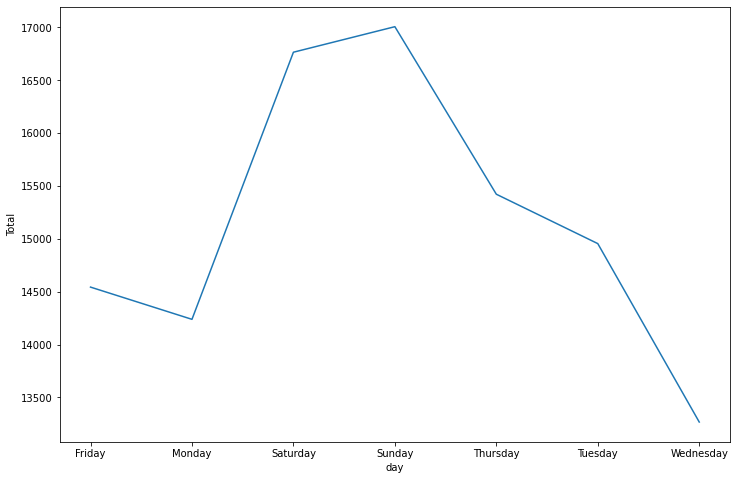

Billing of branch B per branch


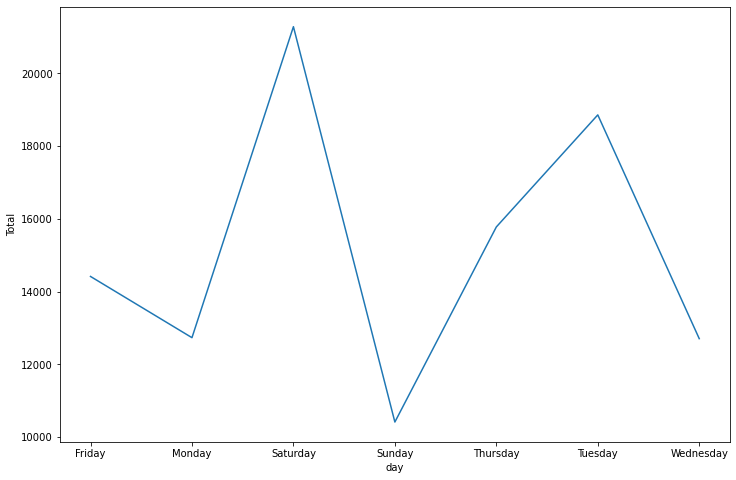

Billing of branch C per branch


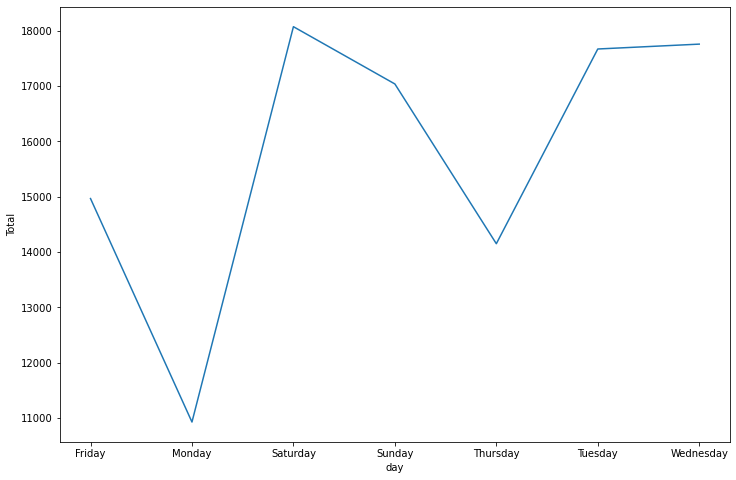

In [522]:
#Billing based on the day (of each branch)
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_billing_day_branch = pd.DataFrame(sales_branch.groupby('day')['Total'].sum())
    sales_billing_day_branch = sales_billing_day_branch.reset_index()
    print(f'Billing of branch {branch} per branch')
    plt.figure(figsize=(12,8))
    sns.lineplot(x ='day', y = 'Total',data = sales_billing_day_branch)
    plt.show()

Billing of Electronic accessories per hour


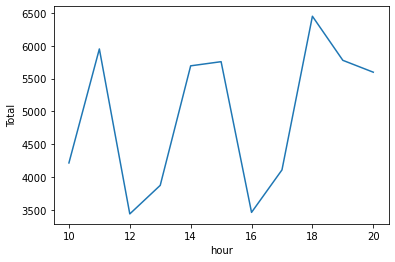

Billing of Fashion accessories per hour


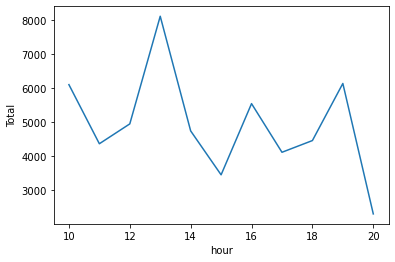

Billing of Sports and travel per hour


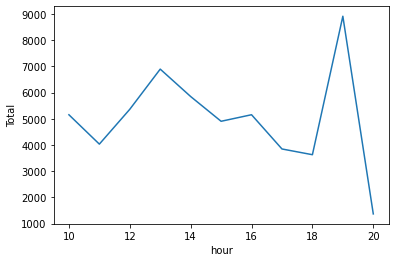

Billing of Home and lifestyle per hour


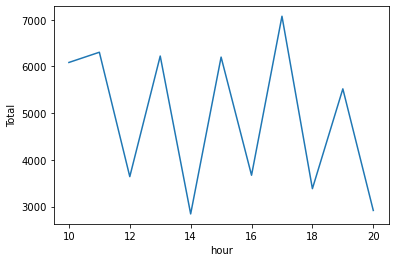

Billing of Food and beverages per hour


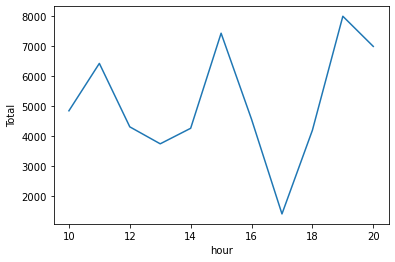

Billing of Health and beauty per hour


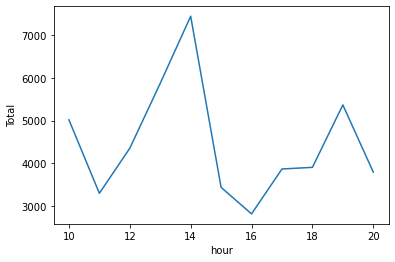

In [523]:
#Billing obtained from each product line based on time
for line in product_lines:
    sales_line_2 = sales_file[sales_file['Product line']==line]
    sales_billing_hour_line = pd.DataFrame(sales_line_2.groupby(['Product line', 'hour'])['Total'].sum())
    sales_billing_hour_line = sales_billing_hour_line.reset_index()
    print(f'Billing of {line} per hour')
    plt.figure(figsize=(6,4))
    sns.lineplot(x = 'hour', y = 'Total',data = sales_billing_hour_line)
    plt.show()

In [524]:
#Billing based on the product line
sales_product_line_total = pd.DataFrame(sales_file.groupby('Product line')['Total'].sum())
sales_product_line_total = sales_product_line_total.reset_index()
sales_product_line_total

,Product line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


Text(0.5, 1.0, 'Billing based on the product line')

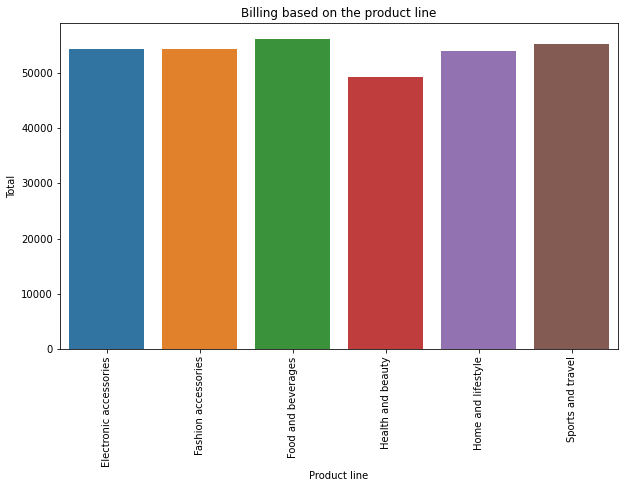

In [526]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x = 'Product line', y = 'Total', data = sales_product_line_total).set_title('Billing based on the product line')

Billing of each product lines based on branch A


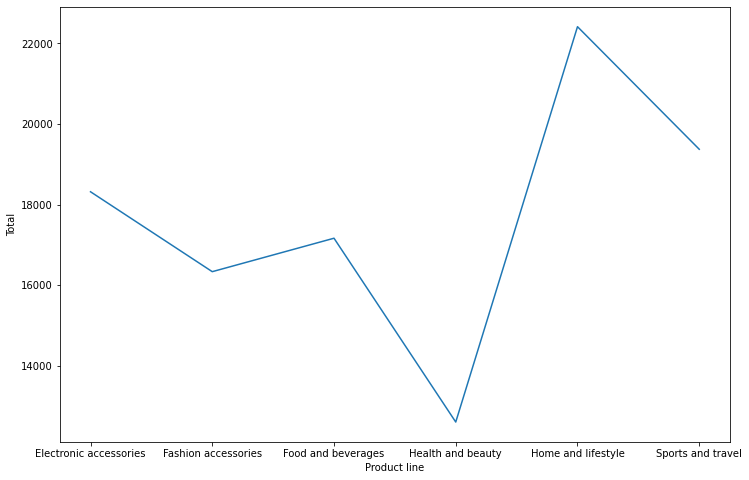

Billing of each product lines based on branch B


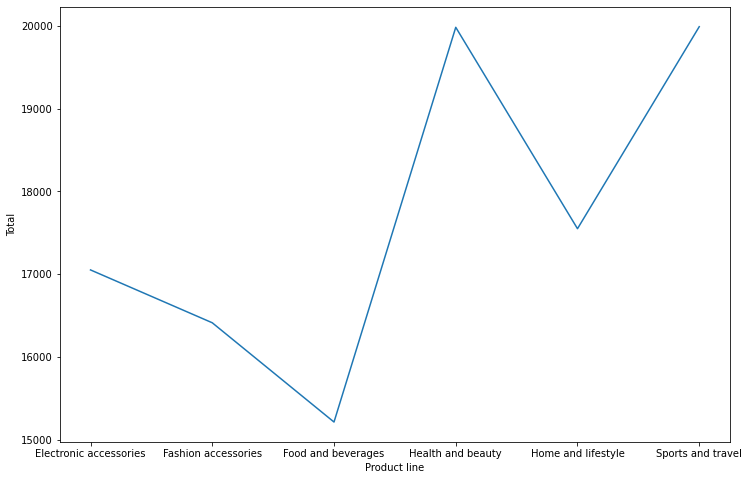

Billing of each product lines based on branch C


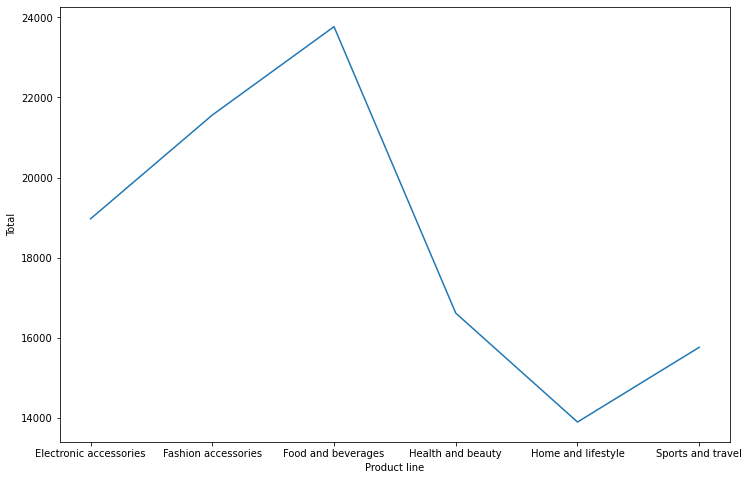

In [527]:
#Billing based on the type of product (classified by branches)
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_billing_product_line_branch = pd.DataFrame(sales_branch.groupby('Product line')['Total'].sum())
    sales_billing_product_line_branch = sales_billing_product_line_branch.reset_index()
    print(f'Billing of each product lines based on branch {branch}')
    plt.figure(figsize=(12,8))
    sns.lineplot(x ='Product line', y = 'Total',data = sales_billing_product_line_branch)
    plt.show()

Billing of Electronic accessories based on rating


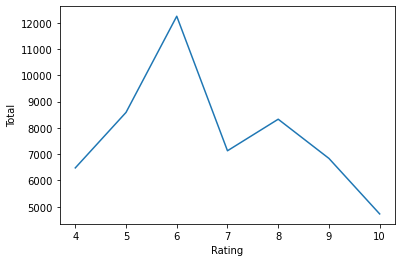

Billing of Fashion accessories based on rating


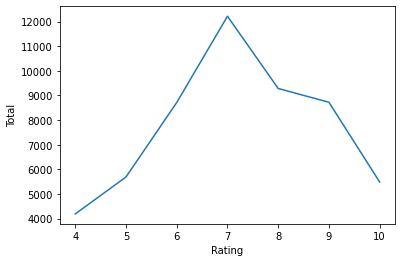

Billing of Sports and travel based on rating


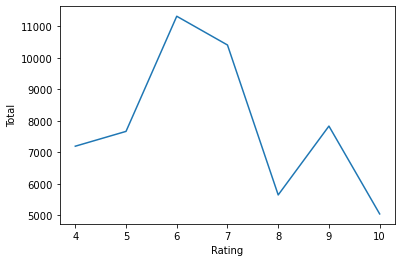

Billing of Home and lifestyle based on rating


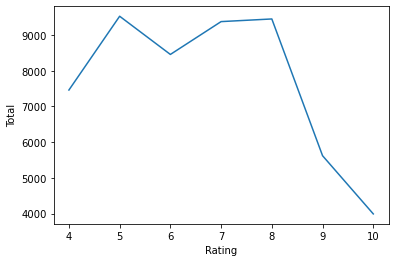

Billing of Food and beverages based on rating


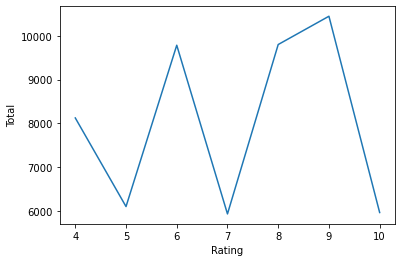

Billing of Health and beauty based on rating


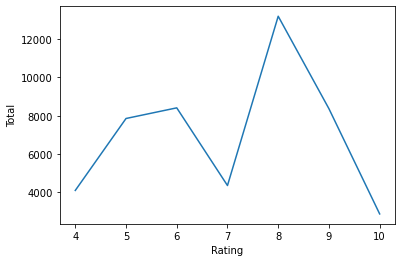

In [528]:
#Billing based on the valuation of each product line
for line in product_lines:
    sales_line_3 = sales_rating[sales_rating['Product line']==line]
    sales_billing_rating_product_line = pd.DataFrame(sales_line_3.groupby('Rating')['Total'].sum())
    sales_billing_rating_product_line = sales_billing_rating_product_line.reset_index()
    print(f'Billing of {line} based on rating')
    plt.figure(figsize=(6,4))
    sns.lineplot(x = 'Rating', y = 'Total',data = sales_billing_rating_product_line)
    plt.show()

In [529]:
#Billing by payment
sales_billing_per_payment_method = sales_file.groupby(['Payment'])['Total'].sum()
sales_billing_per_payment_method

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

Text(0.5, 1.0, 'Billing by payment')

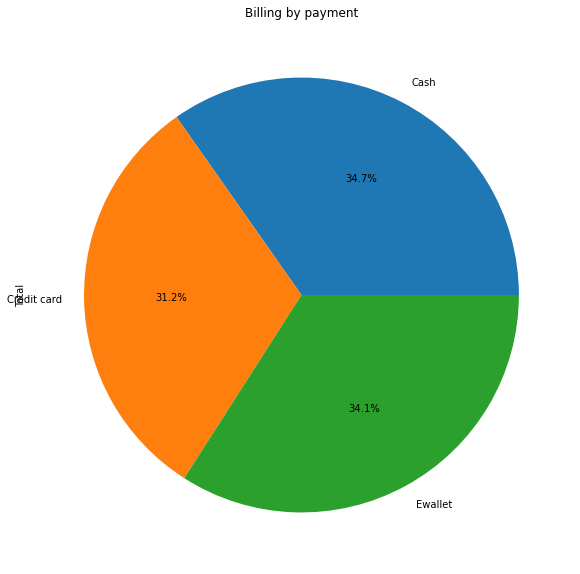

In [530]:
plt.figure(figsize=(14, 10))
sales_billing_per_payment_method.plot(kind='pie', autopct='%1.1f%%').set_title('Billing by payment')

In [ ]:
#Summary
"""
1. Branch 'C' was the one that invoiced the most in the 3
months and the one that did the least was 'B'
2. Women were the highest spenders among
all branches during the 3 months
3. Without being a situation that occurs in all
cases, turnover tends to be higher
in the next few days in the middle of the month and the end of this
4. The days that were billed the most were Saturdays,
followed by Tuesdays
5. The days that were billed the least were Monday,
followed by Wednesdays
6. In branch 'A' more was invoiced in the
4:00 p.m. and 11:00 a.m. hours.
7. Branch 'A' billed less in the
6:00 p.m. and 2:00 p.m. hours.
8. In the branch 'B' more was invoiced in the
7:00 p.m. and 2:00 p.m. hours.
9. Branch 'B' billed less in the
4:00 p.m. and 12:00 p.m. hours.
10. In branch 'C' more was invoiced in the
hours of 7:00 p.m. and 1:00 p.m.
11. Branch 'C' billed less in the
5:00 p.m. and 12:00 p.m. hours.
12. Branch 'A' billed more in the
days sundays and saturdays.
13. Branch 'A' billed less in the
days Wednesday and Monday.
14. In the branch 'B' more was invoiced in the
days saturdays and tuesdays.
15. In branch 'B' less was invoiced in the
days sundays and wednesdays.
16. In branch 'C' more was invoiced in the
Saturdays and Wednesdays (very even with
Tuesdays).
17. In branch 'C' billed less in the
days Monday and Thursday.
18. Electronic accessories reached their
highest billing points
6:00 p.m. and 11:00 a.m. (but containing various peaks)
19. Electronic accessories reached their
lowest billing points
12 noon and 4 p.m.
20. Fashion accessories hit their spots
highest billing at 12 noon
and 10 a.m. (very close to 7 p.m.)
21. Fashion accessories hit their spots
lowest billing at 3:00 p.m.
and 5:00 p.m.
22. Sports and travel products reached
your highest billing points
at 7:00 p.m. and at 1:00 p.m.
23. Sports and travel products reached
their lowest billing points at 6:00 p.m. and at
11 a.m.
24. Home and lifestyle products
reached their highest points of
billing at 5:00 p.m. and 11:00 a.m. (very closely
they are 1:00 p.m. and 3:00 p.m.)
25. Home and lifestyle products reached
their lowest billing points at 2:00 p.m. and at
6:00 p.m.
26. Food and beverage products reached their
highest billing points
at 7:00 p.m. and at 3:00 p.m.
27. Food and beverage products reached their
lowest billing points
at 5:00 p.m. and at 1:00 p.m.
28. Health and beauty products reached their
highest billing points
at 2:00 p.m. and at 1:00 p.m.
29. Health and beauty products reached their
lowest billing points at 4:00 p.m. and 11:00 a.m.
30. The product line that invoiced the most money was
that of food and drink (very closely that of sports and
trips)
31. The product line that invoiced less money was
health and beauty
32. At branch 'A', the product lines that most
billed were: home and lifestyle, sports and travel
33. At branch 'A', the product lines that least
invoiced were: health
and beauty, beauty accessories
34. At branch 'B', the product lines that most
billed were: sports and travel, health and lifestyle
life
35. At branch 'B', the product lines that least
invoiced were: food and drink, fashion accessories
36. At branch 'C', the product lines that most
invoiced were: food and drink, fashion accessories
37. At branch 'C', the product lines that least
billed were: home and lifestyle, sports and travel
38. Considering the feedback given by customers
about electronic accessories, which reached
their highest billing points were the
that have 6 and 5 valuation
39. Considering the feedback given by customers
about accessories
electronics, which reached their lowest points
billing were those with 10 and 4 valuation
40. Considering the feedback given by customers
about accessories
fashion, those who reached their highest points of
billing were the ones
they have 7 and 8 valuation
41. Considering the feedback given by customers
about accessories
fashion, those who reached their lowest points were
those with 4 and 10 (very
even with those with 5) rating
42. Considering the assessment given by the
customers about the products
sport and travel, those who reached their points
highest billing were the
who have 6 and 7 valuation
43. Considering the assessment given by the
customers about the products
sport and travel, those who reached their points
lowest billing were the
that have 8 and 10 valuation
44. Considering the assessment given by the
customers about the products
home and lifestyle, those who achieved their
highest billing points were
those who have 5 and 8 (very even with those of 7)
valuation
45. Considering the assessment given by the
customers about household products
and lifestyle, those who reached their points
lowest billing were those who
they have 10 and 9 valuation
46. ​​Considering the feedback given by customers
about food and drink,
those who reached their highest billing points
were those with 9 and 8 (very
closely those with 6) valuation
47. Considering the feedback given by customers
about food and drink
that reached their lowest billing points were
those who have 10 and 7 (very
close those with 5) rating
48. Considering the feedback given by customers
about health products
and beauty, those who reached their highest points of
billing were those with 8 and 9 valuation
49. Considering the feedback given by customers
about health products
and beauty, those who reached their lowest points of
billing were those with 10 and 7 rating
50. The method of payment for which the most was billed was
cash and the least was by credit card
"""

In [531]:
#Income by gender 
sales_file_gender_income = pd.DataFrame(sales_file.groupby('Gender')['gross income'].sum())
sales_file_gender_income

,gross income
Gender,
Female,7994.425
Male,7384.944


Text(0.5, 1.0, 'Income by gender ')

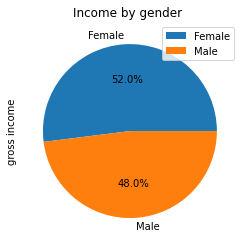

In [532]:
sales_file_gender_income.plot(kind='pie',y='gross income',autopct='%1.1f%%').set_title('Income by gender ')

In [533]:
#Income per branch
sales_file_branch_income = sales_file.groupby('Branch')['gross income'].sum()
sales_file_branch_income

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

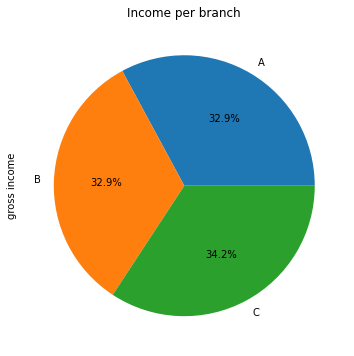

In [534]:
plt.figure(figsize=(10, 6))
sales_file_branch_income.plot(kind='pie',y='gross income',autopct='%1.1f%%').set_title('Income per branch')
plt.show()

In [535]:
#Income per customer type
sales_file_customer_type_income = sales_file.groupby('Customer type')['gross income'].sum()
sales_file_customer_type_income

Customer type
Member    7820.164
Normal    7559.205
Name: gross income, dtype: float64

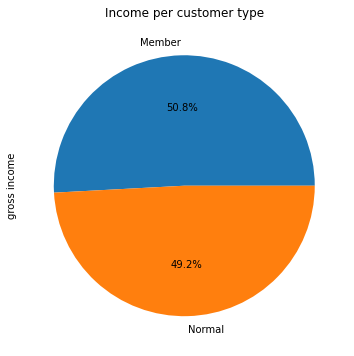

In [536]:
plt.figure(figsize=(10, 6))
sales_file_customer_type_income.plot(kind='pie',y='gross income',autopct='%1.1f%%').set_title('Income per customer type')
plt.show()

Text(0.5, 1.0, 'Income per date')

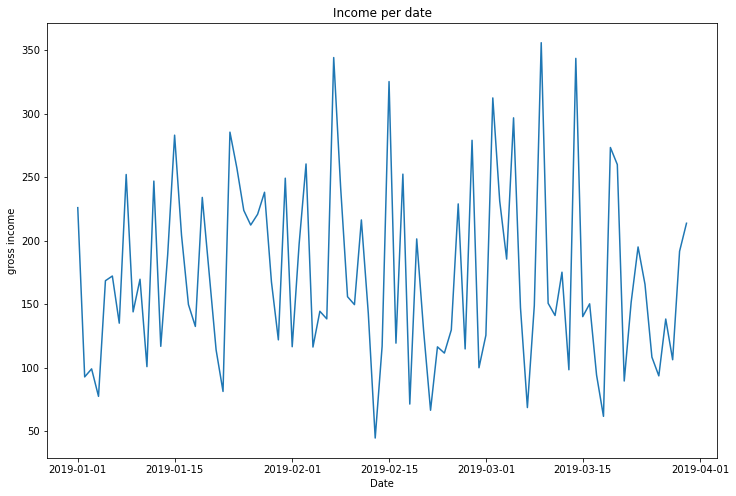

In [537]:
#Income per date 
sales_income_date = pd.DataFrame(sales_file.groupby(['Date'])['gross income'].sum())
sales_income_date = sales_income_date.reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(x = 'Date', y = 'gross income',data = sales_income_date).set_title('Income per date')

Income of branch A based on date


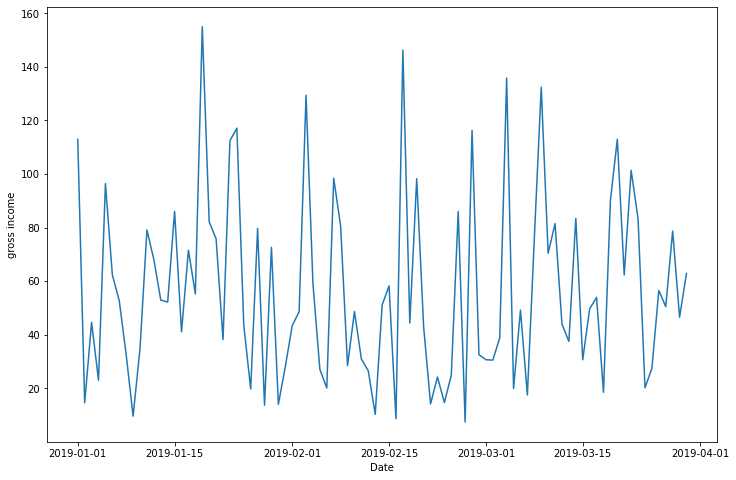

Income of branch B based on date


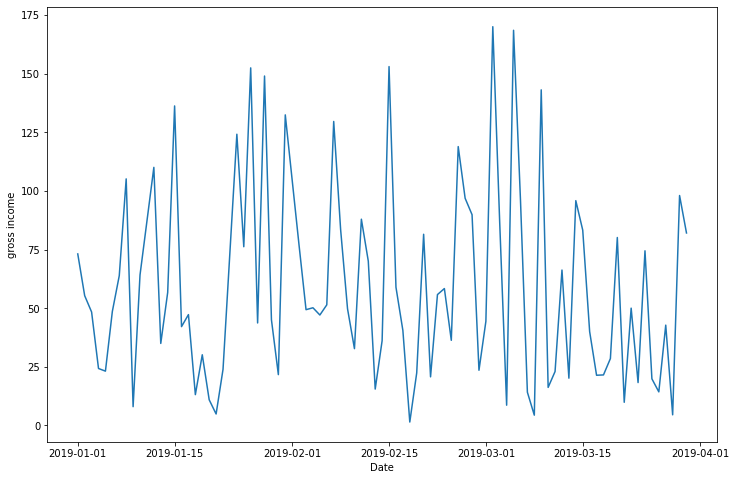

Income of branch C based on date


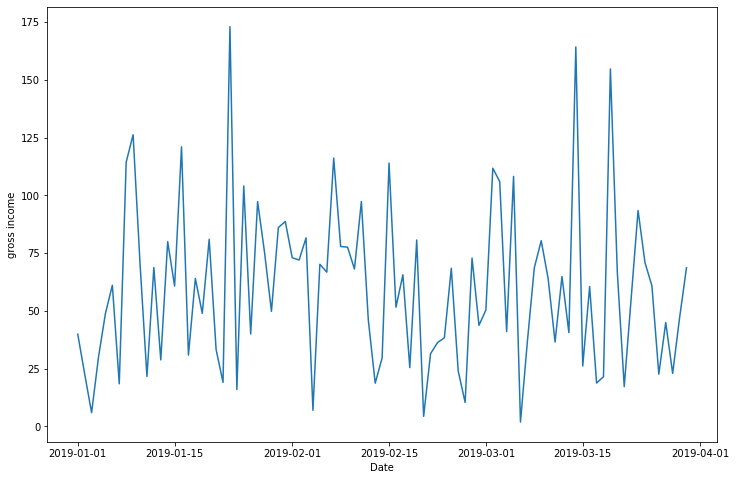

In [538]:
#Income based on date (for each branch)
Branch = ['A', 'B', 'C']
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_income_date_branch = pd.DataFrame(sales_branch.groupby(['Branch', 'Date'])['gross income'].sum())
    sales_income_date_branch = sales_income_date_branch.reset_index()
    print(f'Income of branch {branch} based on date')
    plt.figure(figsize=(12,8))
    sns.lineplot(x = 'Date', y = 'gross income',data = sales_income_date_branch)
    plt.show()

In [539]:
#Income per day
sales_income_per_day = sales_file.groupby(['day'])['gross income'].sum()
sales_income_per_day

day
Friday       2091.7305
Monday       1804.7180
Saturday     2672.4195
Sunday       2117.0425
Thursday     2159.4880
Tuesday      2451.5355
Wednesday    2082.4350
Name: gross income, dtype: float64

Text(0.5, 1.0, 'Income per day')

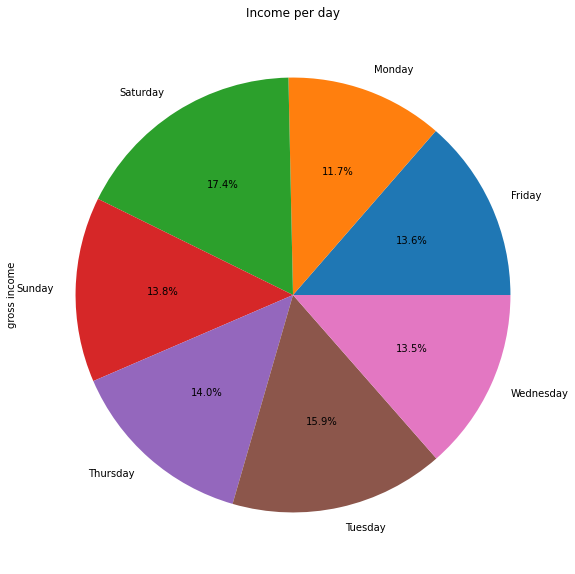

In [540]:
plt.figure(figsize=(14,10))
sales_income_per_day.plot(kind='pie', autopct='%1.1f%%').set_title('Income per day')

Income of branch A per day


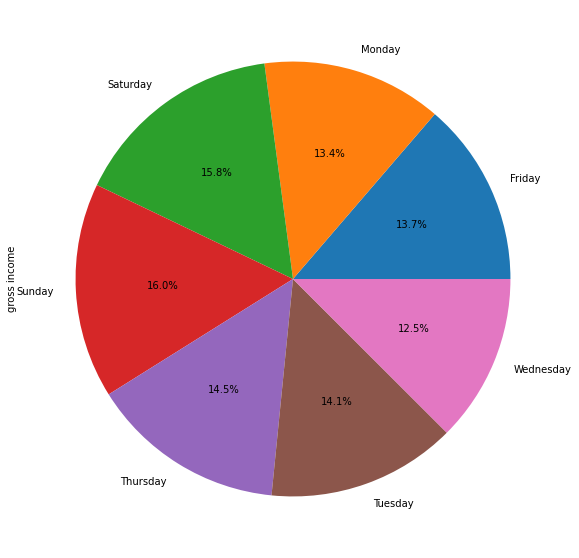

Income of branch B per day


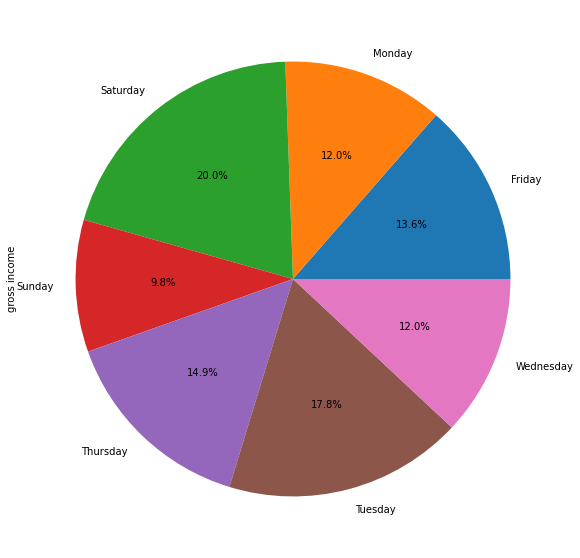

Income of branch C per day


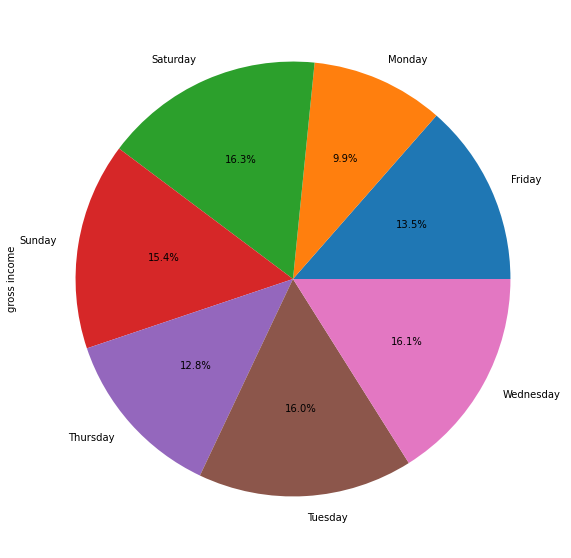

In [541]:
#Income based on the day (of each branch)
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    income_per_day_and_branch = sales_branch.groupby('day')['gross income'].sum()
    print(f'Income of branch {branch} per day')
    plt.figure(figsize=(14,10))
    income_per_day_and_branch.plot(kind='pie', autopct='%1.1f%%')
    plt.show()

Income of Electronic accessories per day


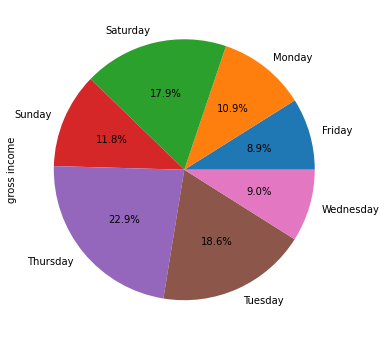

Income of Fashion accessories per day


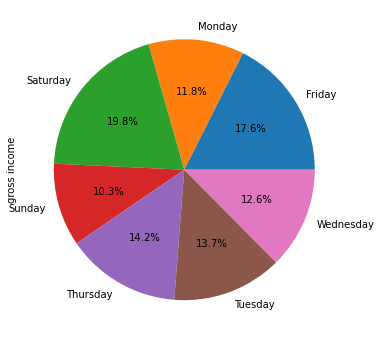

Income of Sports and travel per day


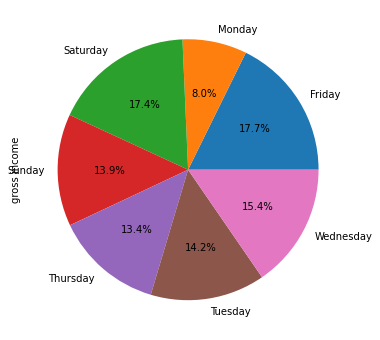

Income of Home and lifestyle per day


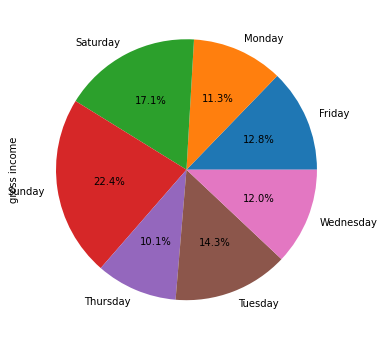

Income of Food and beverages per day


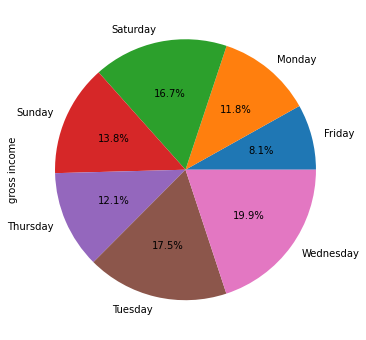

Income of Health and beauty per day


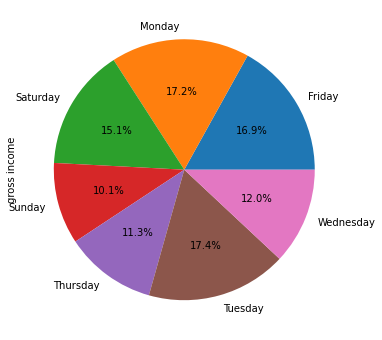

In [542]:
#Income of each product line based on the day
for line in product_lines:
    sales_line = sales_file[sales_file['Product line']==line]
    income_per_day_and_line = sales_line.groupby('day')['gross income'].sum()
    print(f'Income of {line} per day')
    plt.figure(figsize=(8,6))
    income_per_day_and_line.plot(kind='pie', autopct='%1.1f%%')
    plt.show()

In [311]:
#Income per hour
sales_income_hour = sales_file.groupby('hour')['gross income'].sum()
sales_income_hour

hour
10    1496.2610
11    1446.5395
12    1241.2325
13    1653.4870
14    1468.0190
15    1484.7385
16    1201.2535
17    1164.0580
18    1239.5400
19    1890.4530
20    1093.7870
Name: gross income, dtype: float64

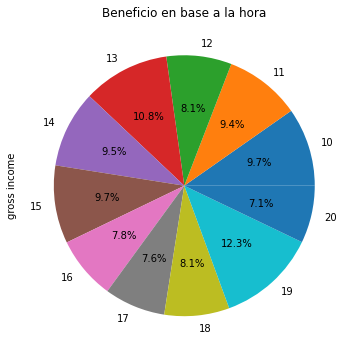

In [312]:
plt.figure(figsize=(10,6))
sales_income_hour.plot(kind='pie', autopct='%1.1f%%').set_title('Income per hour')
plt.show()

Income of branch A pero hour


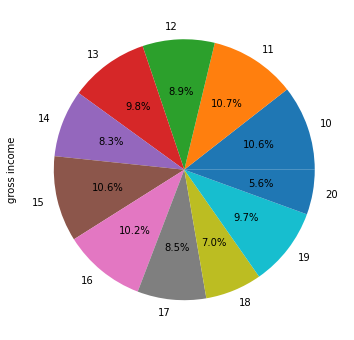

Income of branch B pero hour


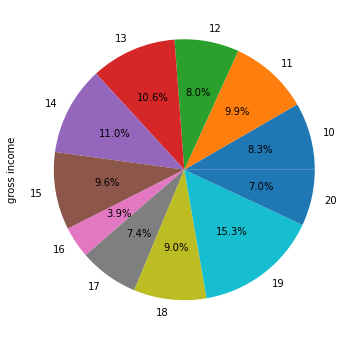

Income of branch C pero hour


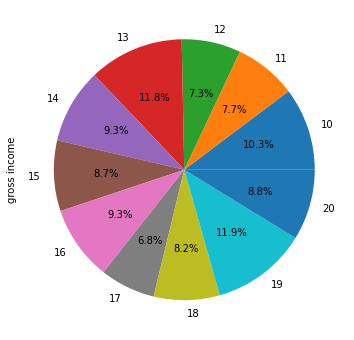

In [543]:
#Income based on the hour (of each branch)
for branch in Branch:
    sales_branch = sales_file[sales_file['Branch']==branch]
    sales_income_hour_branch = sales_branch.groupby('hour')['gross income'].sum()
    print(f'Income of branch {branch} pero hour')
    plt.figure(figsize=(10,6))
    sales_income_hour_branch.plot(kind='pie', autopct='%1.1f%%')
    plt.show()

Income of Electronic accessories per hour


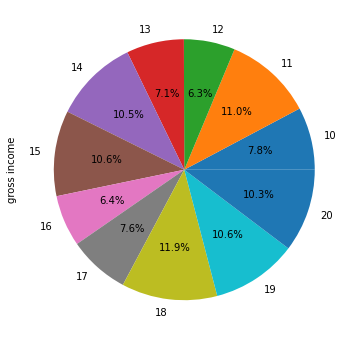

Income of Fashion accessories per hour


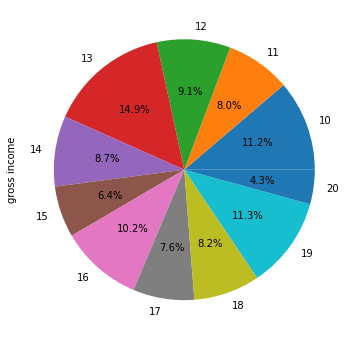

Income of Sports and travel per hour


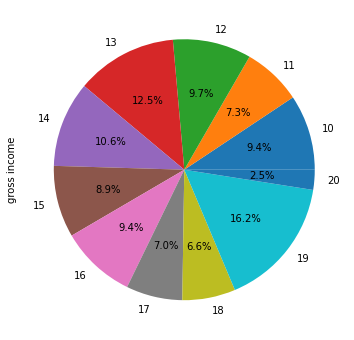

Income of Home and lifestyle per hour


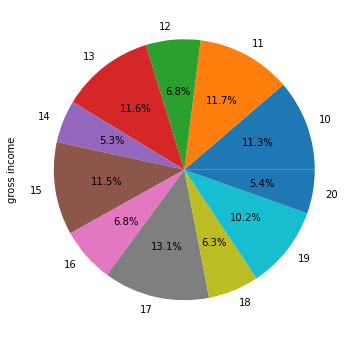

Income of Food and beverages per hour


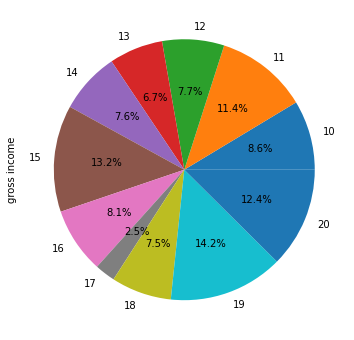

Income of Health and beauty per hour


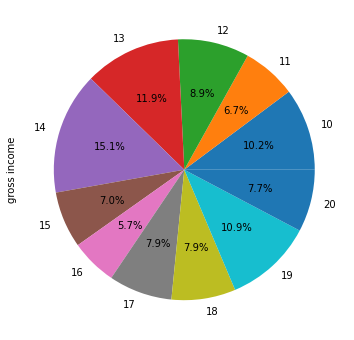

In [544]:
#Profit obtained from each product line based on the hour
for line in product_lines:
    sales_line_2 = sales_file[sales_file['Product line']==line]
    sales_income_hour_line = sales_line_2.groupby('hour')['gross income'].sum()
    print(f'Income of {line} per hour')
    plt.figure(figsize=(8,6))
    sales_income_hour_line.plot(kind='pie', autopct='%1.1f%%')
    plt.show()

In [545]:
#Income per payment method
sales_income_per_payment_method = sales_file.groupby(['Payment'])['gross income'].sum()
sales_income_per_payment_method

Payment
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross income, dtype: float64

Text(0.5, 1.0, 'Income per payment method')

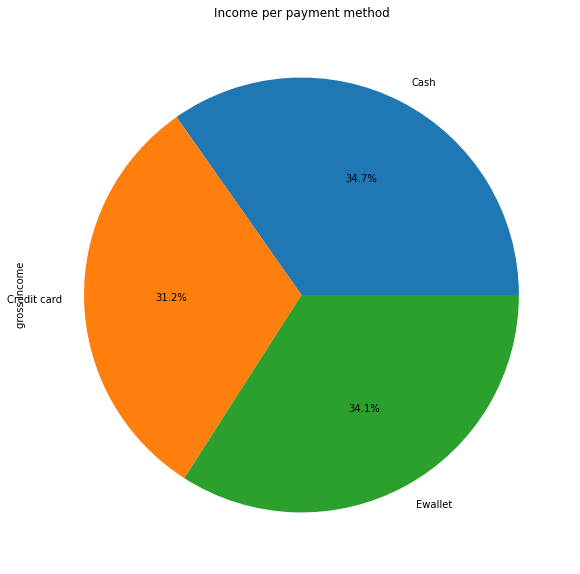

In [546]:
plt.figure(figsize=(14, 10))
sales_income_per_payment_method.plot(kind='pie', autopct='%1.1f%%').set_title('Income per payment method')

In [547]:
#Income per product line
sales_income_per_product_line = sales_file.groupby(['Product line'])['gross income'].sum()
sales_income_per_product_line

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

Text(0.5, 1.0, 'Income per product line')

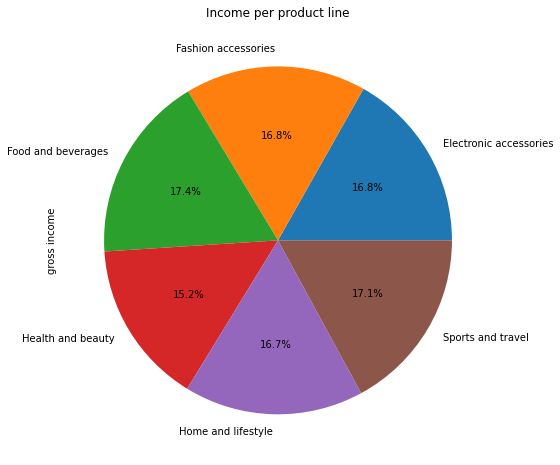

In [548]:
plt.figure(figsize=(12, 8))
sales_income_per_product_line.plot(kind='pie', autopct='%1.1f%%').set_title('Income per product line')

Income of Electronic accessories based on the rating


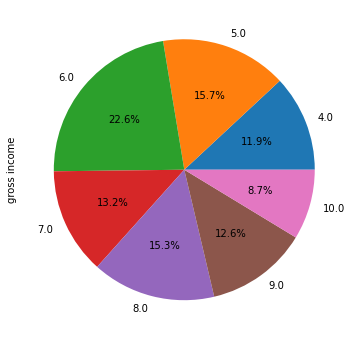

Income of Fashion accessories based on the rating


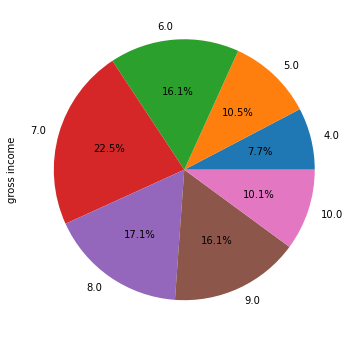

Income of Sports and travel based on the rating


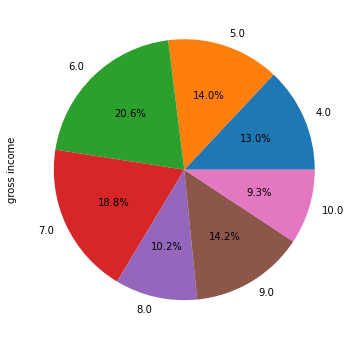

Income of Home and lifestyle based on the rating


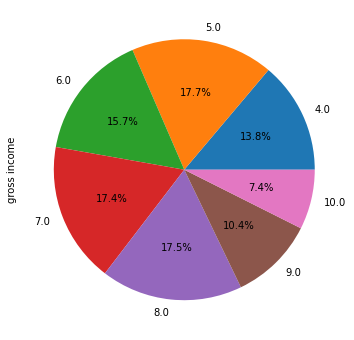

Income of Food and beverages based on the rating


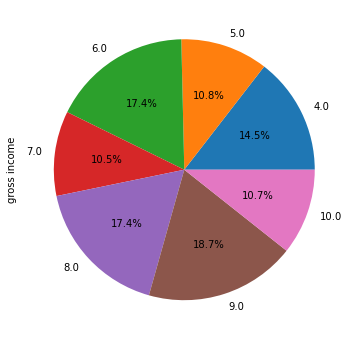

Income of Health and beauty based on the rating


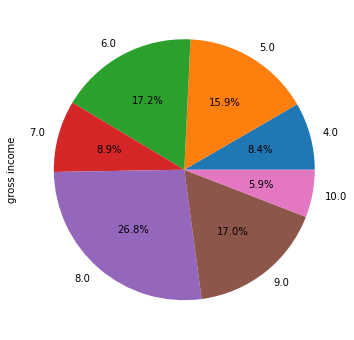

In [549]:
#Income based on the rating of each product line
for line in product_lines:
    sales_line_3 = sales_rating[sales_rating['Product line']==line]
    sales_income_rating_product_line = sales_line_3.groupby('Rating')['gross income'].sum()
    print(f'Income of {line} based on the rating')
    plt.figure(figsize=(8,6))
    sales_income_rating_product_line.plot(kind='pie', autopct='%1.1f%%')
    plt.show()

In [ ]:
#Summary
"""
1. What is analyzed in this section is the same as in the
billing section, but with another graph style
To better visualize the percentage that
represents each value
"""

In [ ]:
#Recommendations
"""
1. The valuation does not tend to be very high, it is
product quality needs to be improved
or services
2. Wholesale purchase offers can be made,
among other activities on the days
fewer people attend branches, thus attracting
more clients
3. If we manage to increase the quality of our
products we could try to upload in certain
grade the prices, well get more profit
4. After analyzing the tastes of men and women
Regarding the product lines we can
conclude that it is the women you prefer accessories of
fashion and men health and beauty,
but in turn the least popular among women are
health and beauty products, this
can happen because of the offers that are offered and to whom
advertising is targeted, etc. Would
interesting to try to add advertising or offers to
the other gender, in this way we would have
more potential customers.
5. It is necessary to consider for the following analyzes
customer service, so we'll see if
the rating given by customers is not affected by
this.
6. Start implementing strategies such as increasing
the size of the shopping carts,
more strategically place products, implement
home delivery, among others, which
are ways to increase sales in supermarkets and then
analyze its impact on the business.
"""